In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


np.set_printoptions(suppress=True)
%config InlineBackend.figure_format = 'retina'

In [97]:
df = pd.read_csv('Attrition Data 2.csv')

In [98]:
df.head()

Age Attrition              Department  DistanceFromHome  Education  \
0   41       Yes                   Sales                 1          2   
1   49        No  Research & Development                 8          1   
2   37       Yes  Research & Development                 2          2   
3   33        No  Research & Development                 3          4   
4   27        No  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        2                4        Single   
1  Life Sciences                        3                2       Married   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                   8                1               6  
1           5130                   1                3              10  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2

In [99]:
df['Attrition'] = df.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)

In [100]:
df.describe()

Age    Attrition  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224          9.192517     2.912925   
std       9.135373     0.367863          8.106864     1.024165   
min      18.000000     0.000000          1.000000     1.000000   
25%      30.000000     0.000000          2.000000     2.000000   
50%      36.000000     0.000000          7.000000     3.000000   
75%      43.000000     0.000000         14.000000     4.000000   
max      60.000000     1.000000         29.000000     5.000000   

       EnvironmentSatisfaction  JobSatisfaction  MonthlyIncome  \
count              1470.000000      1470.000000    1470.000000   
mean                  2.721769         2.728571    6502.931293   
std                   1.093082         1.102846    4707.956783   
min                   1.000000         1.000000    1009.000000   
25%                   2.000000         2.000000    2911.000000   
50%                   3.000000         3.000000    4919.000000   
75%                   4.000000         4.000000    8379.000000   
max                   4.000000         4.000000   19999.000000   

       NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
count         1470.000000      1470.000000     1470.000000  
mean             2.693197         2.761224        7.008163  
std              2.498009         0.706476        6.126525  
min              0.000000         1.000000        0.000000  
25%              1.000000         2.000000        3.000000  
50%              2.000000         3.000000        5.000000  
75%              4.000000         3.000000        9.000000  
max              9.000000         4.000000       40.000000

# Exploratory Data Analysis (EDA)

In [101]:
df.dtypes

Age                         int64
Attrition                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

0    1233
1     237
Name: Attrition, dtype: int64


<Axes: >

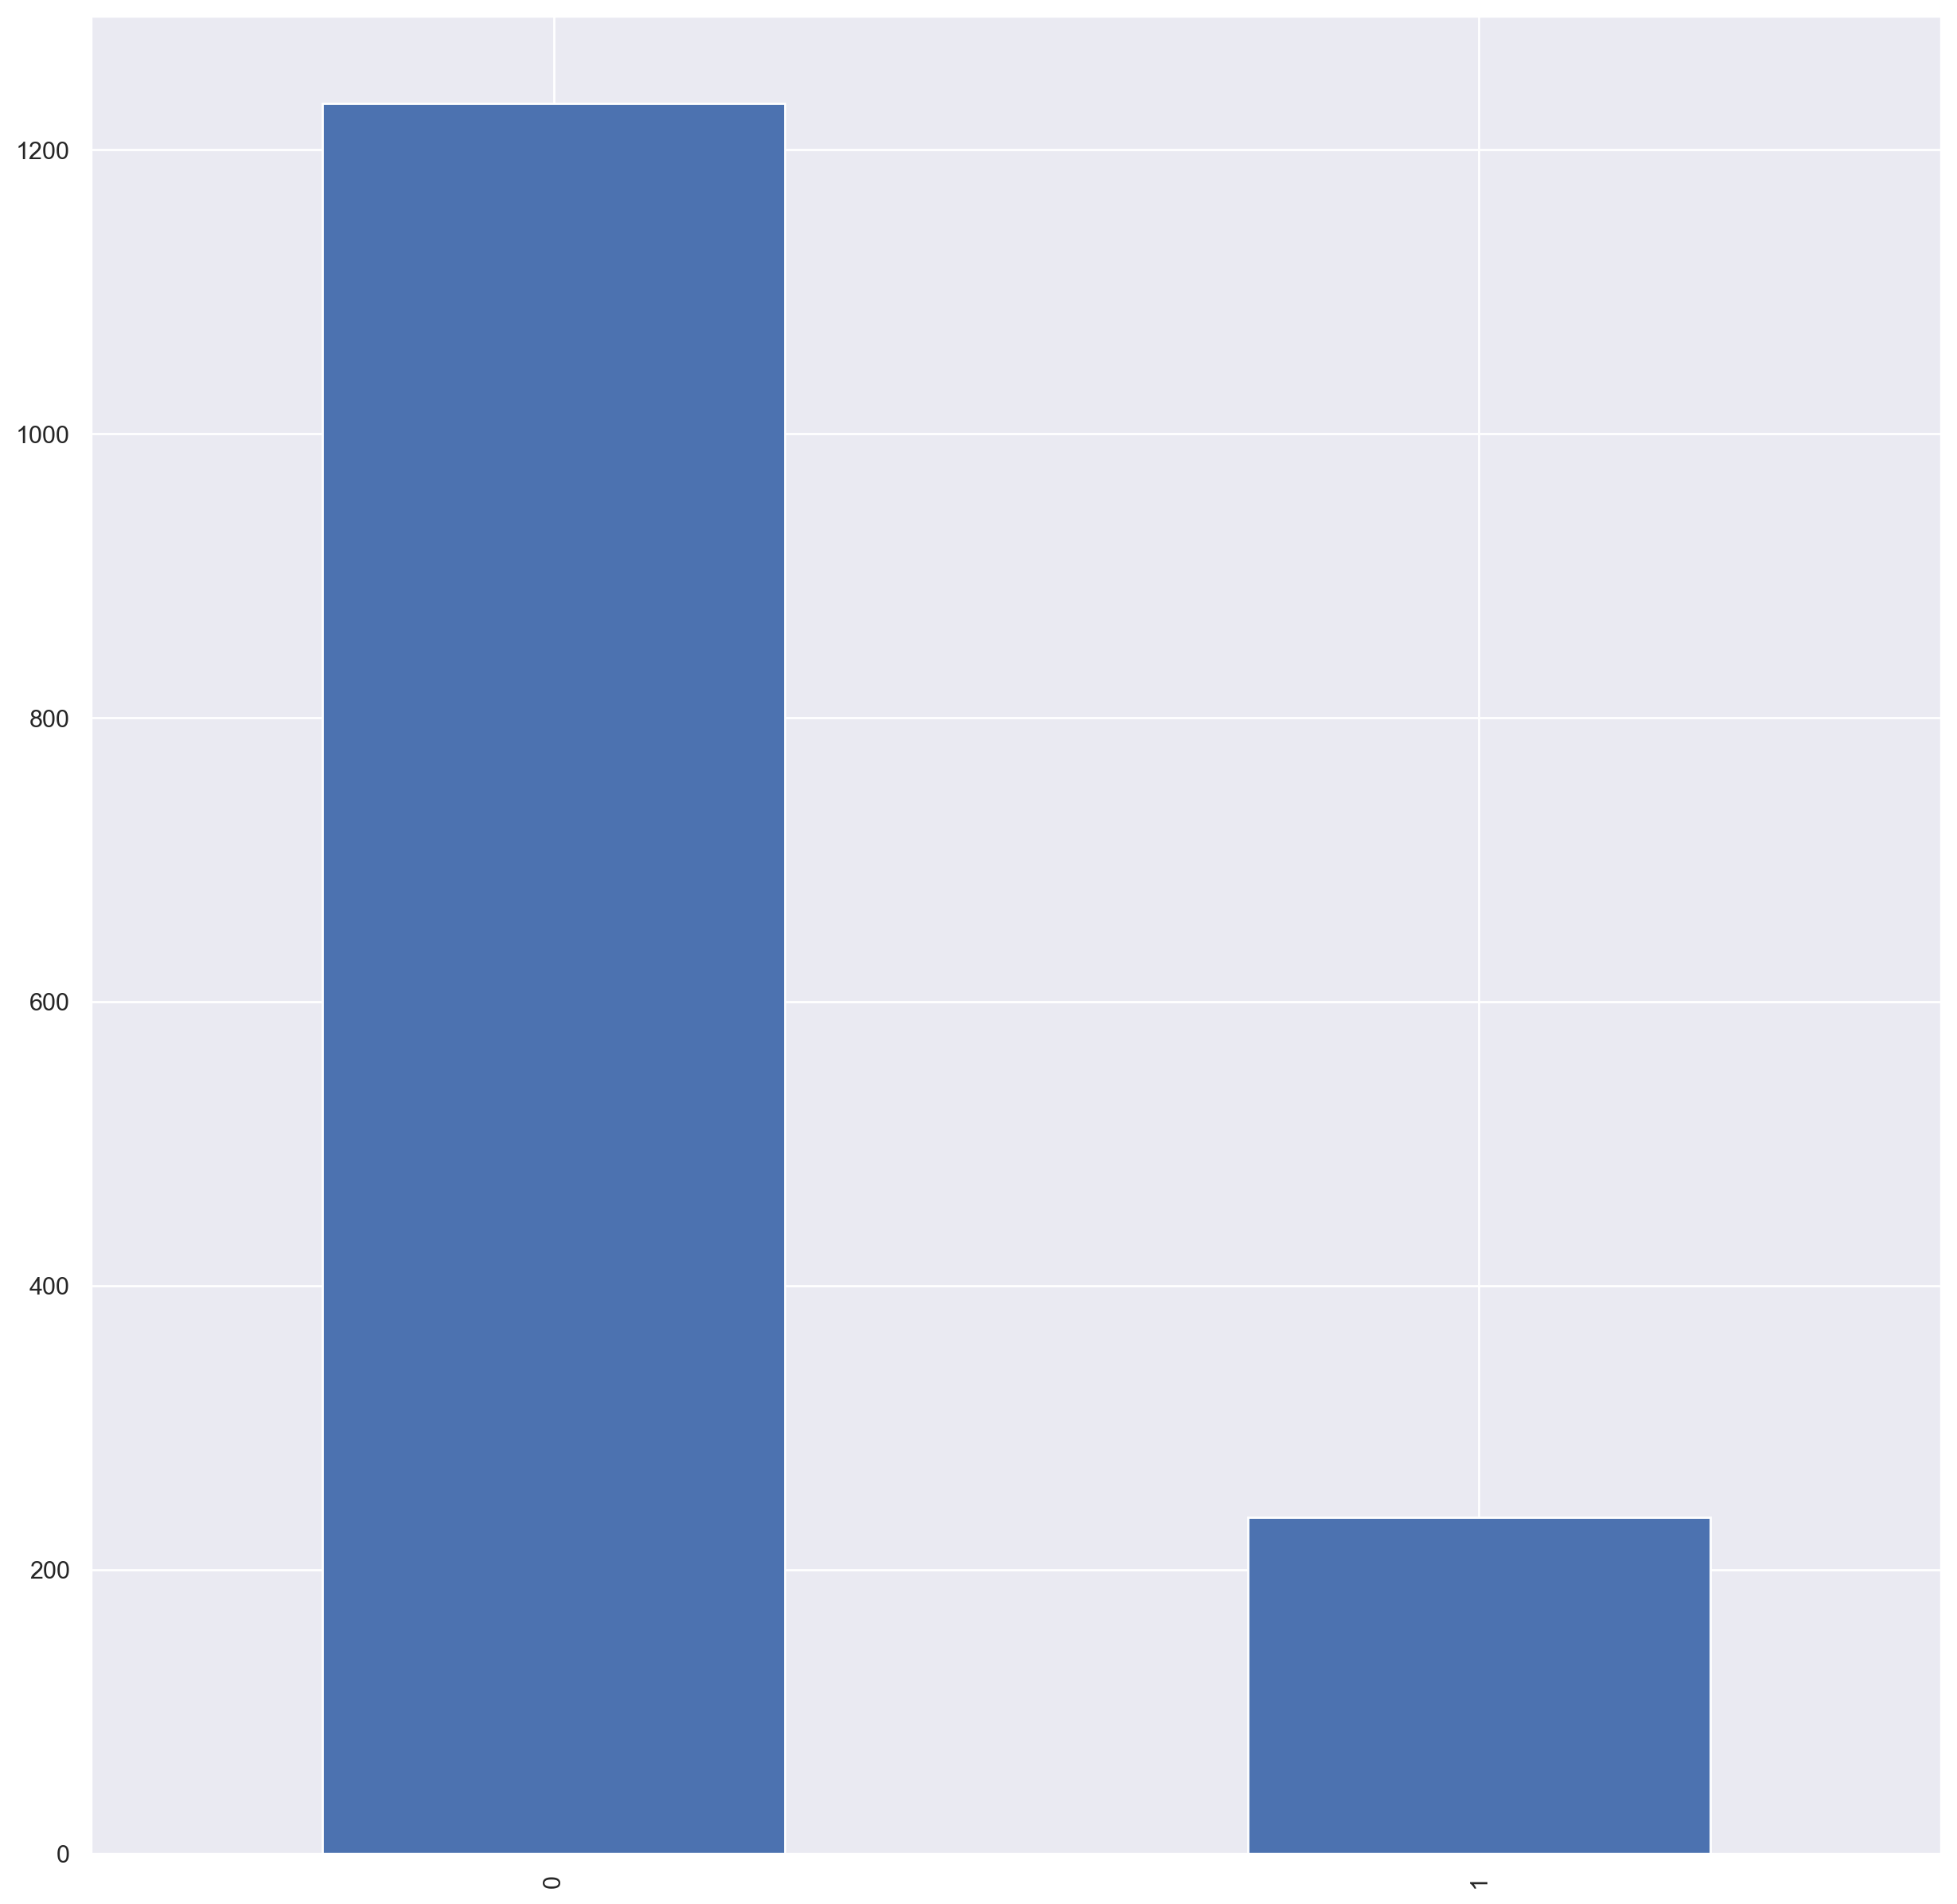

In [102]:
print(df.Attrition.value_counts())
df.Attrition.value_counts().sort_index().plot(kind='bar')

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


<Axes: >

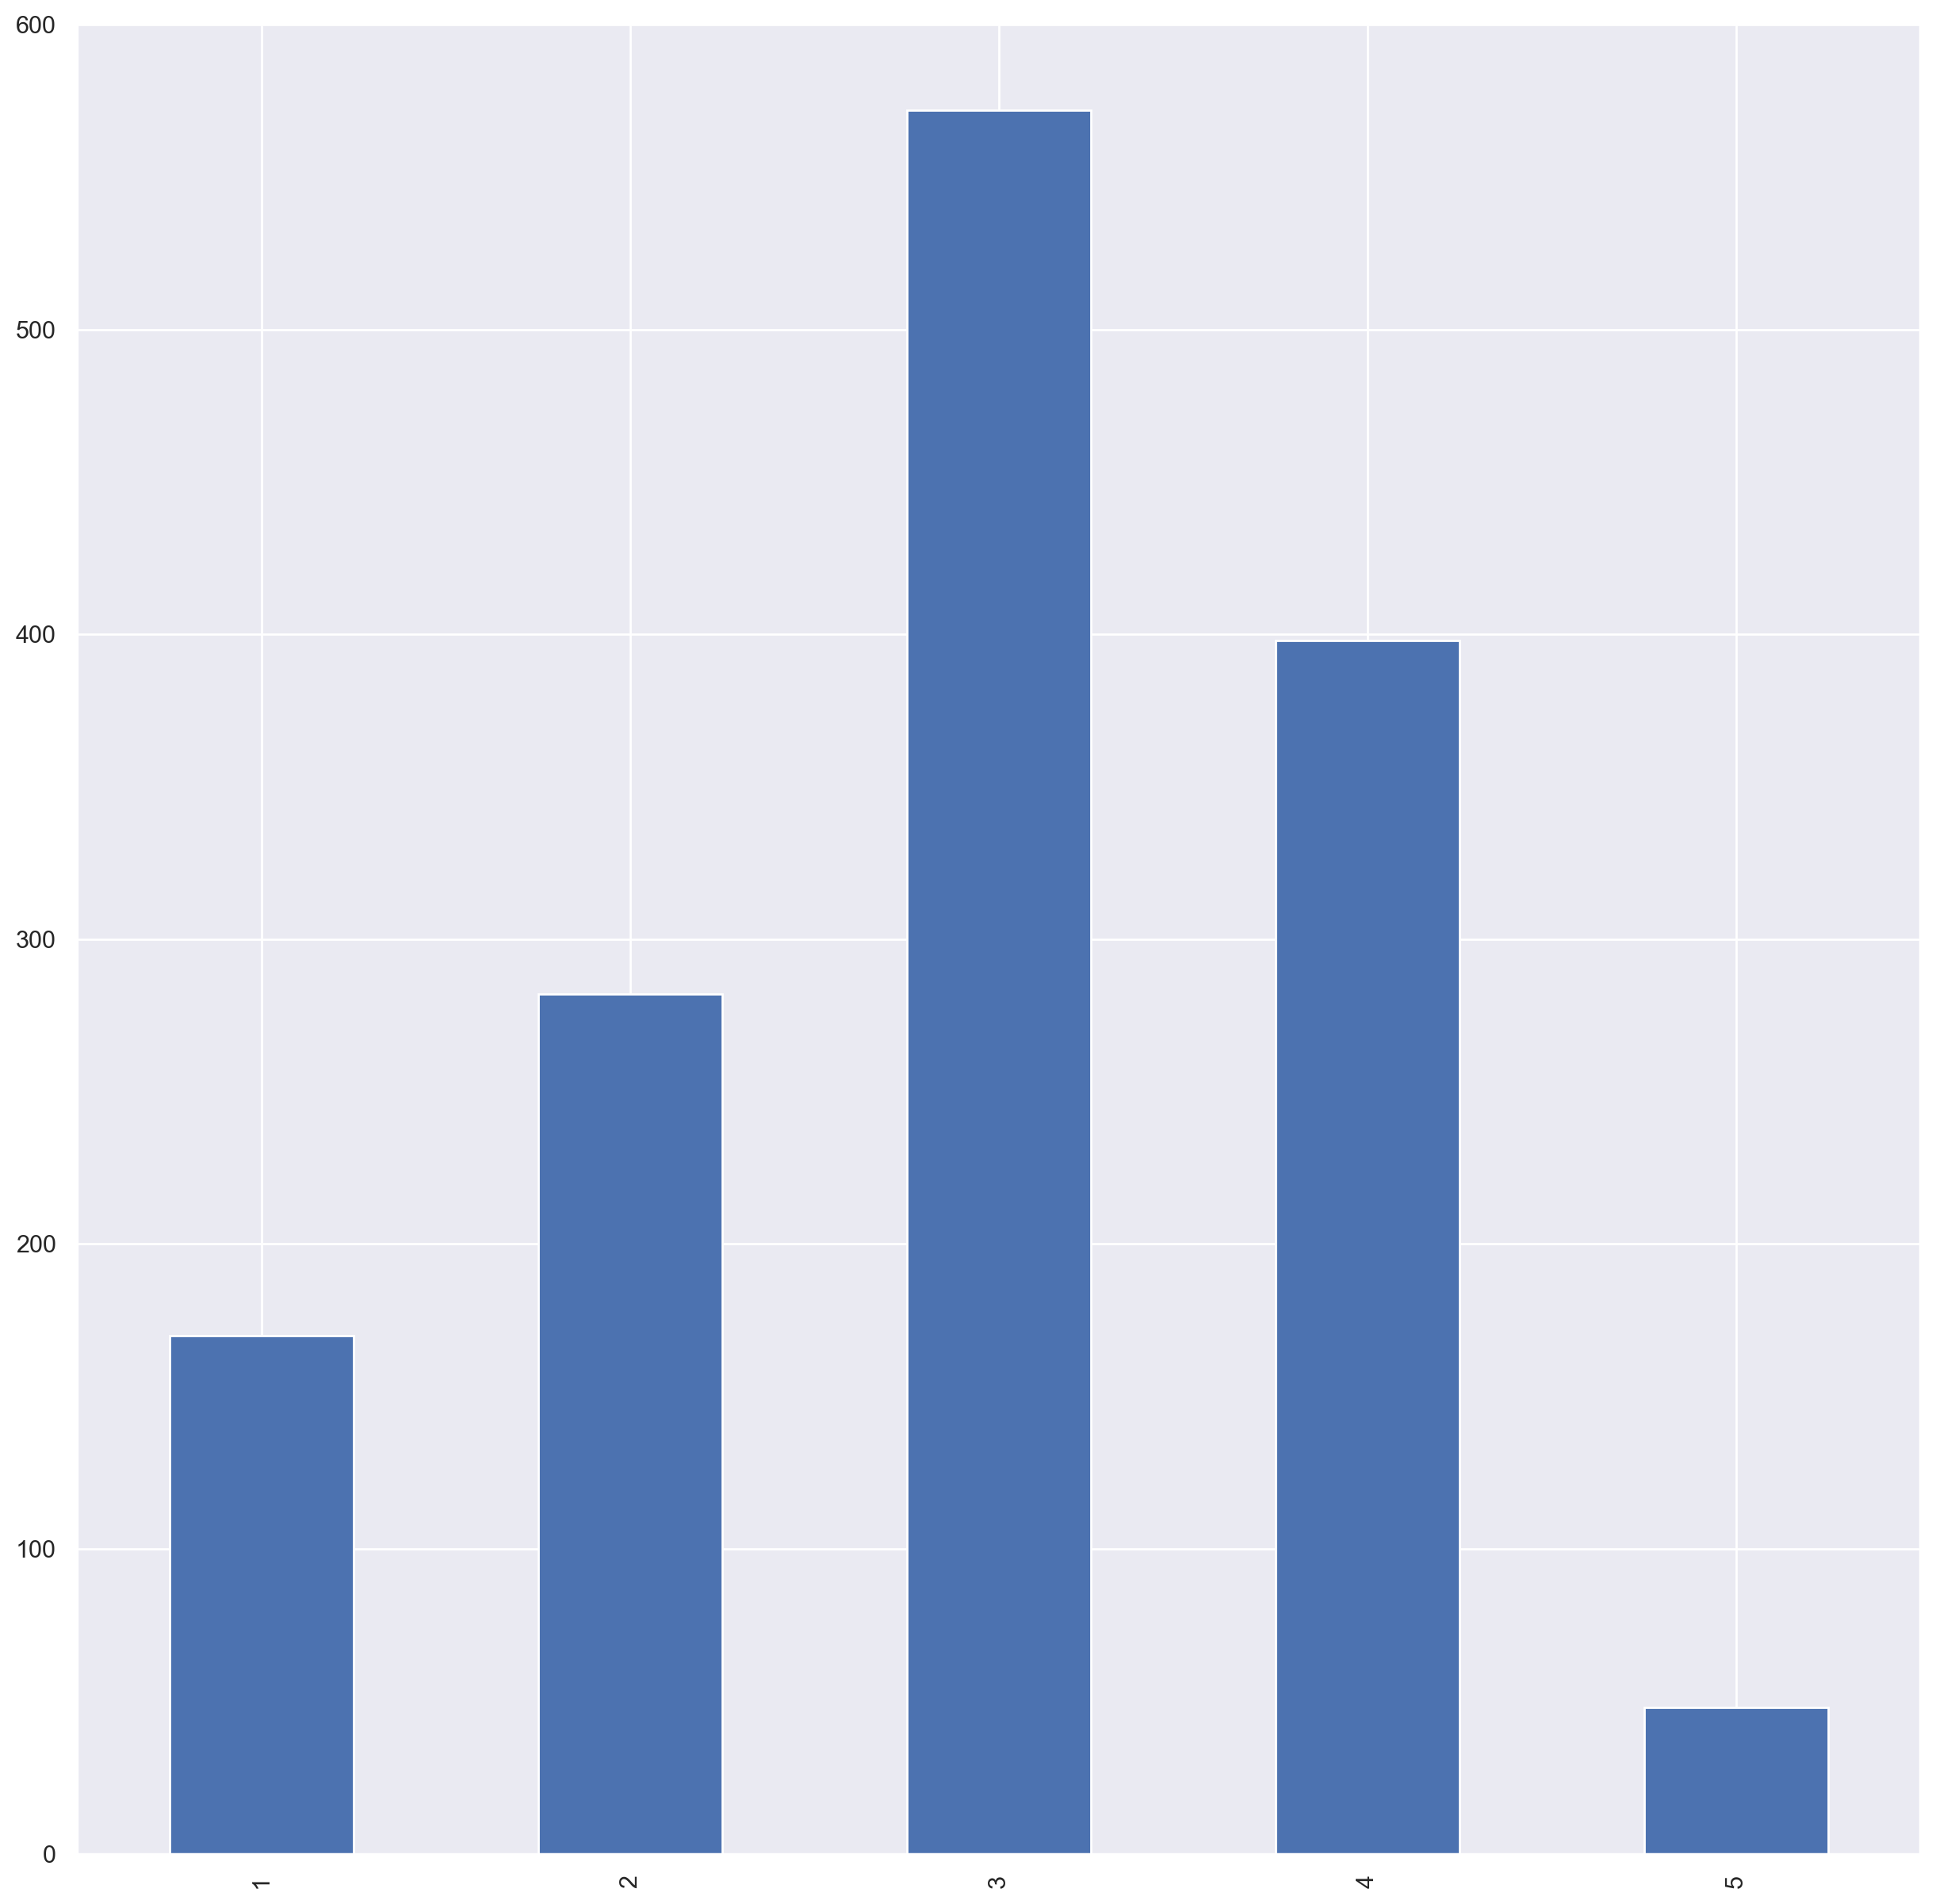

In [103]:
print(df.Education.value_counts())
df.Education.value_counts().sort_index().plot(kind='bar')

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


<Axes: >

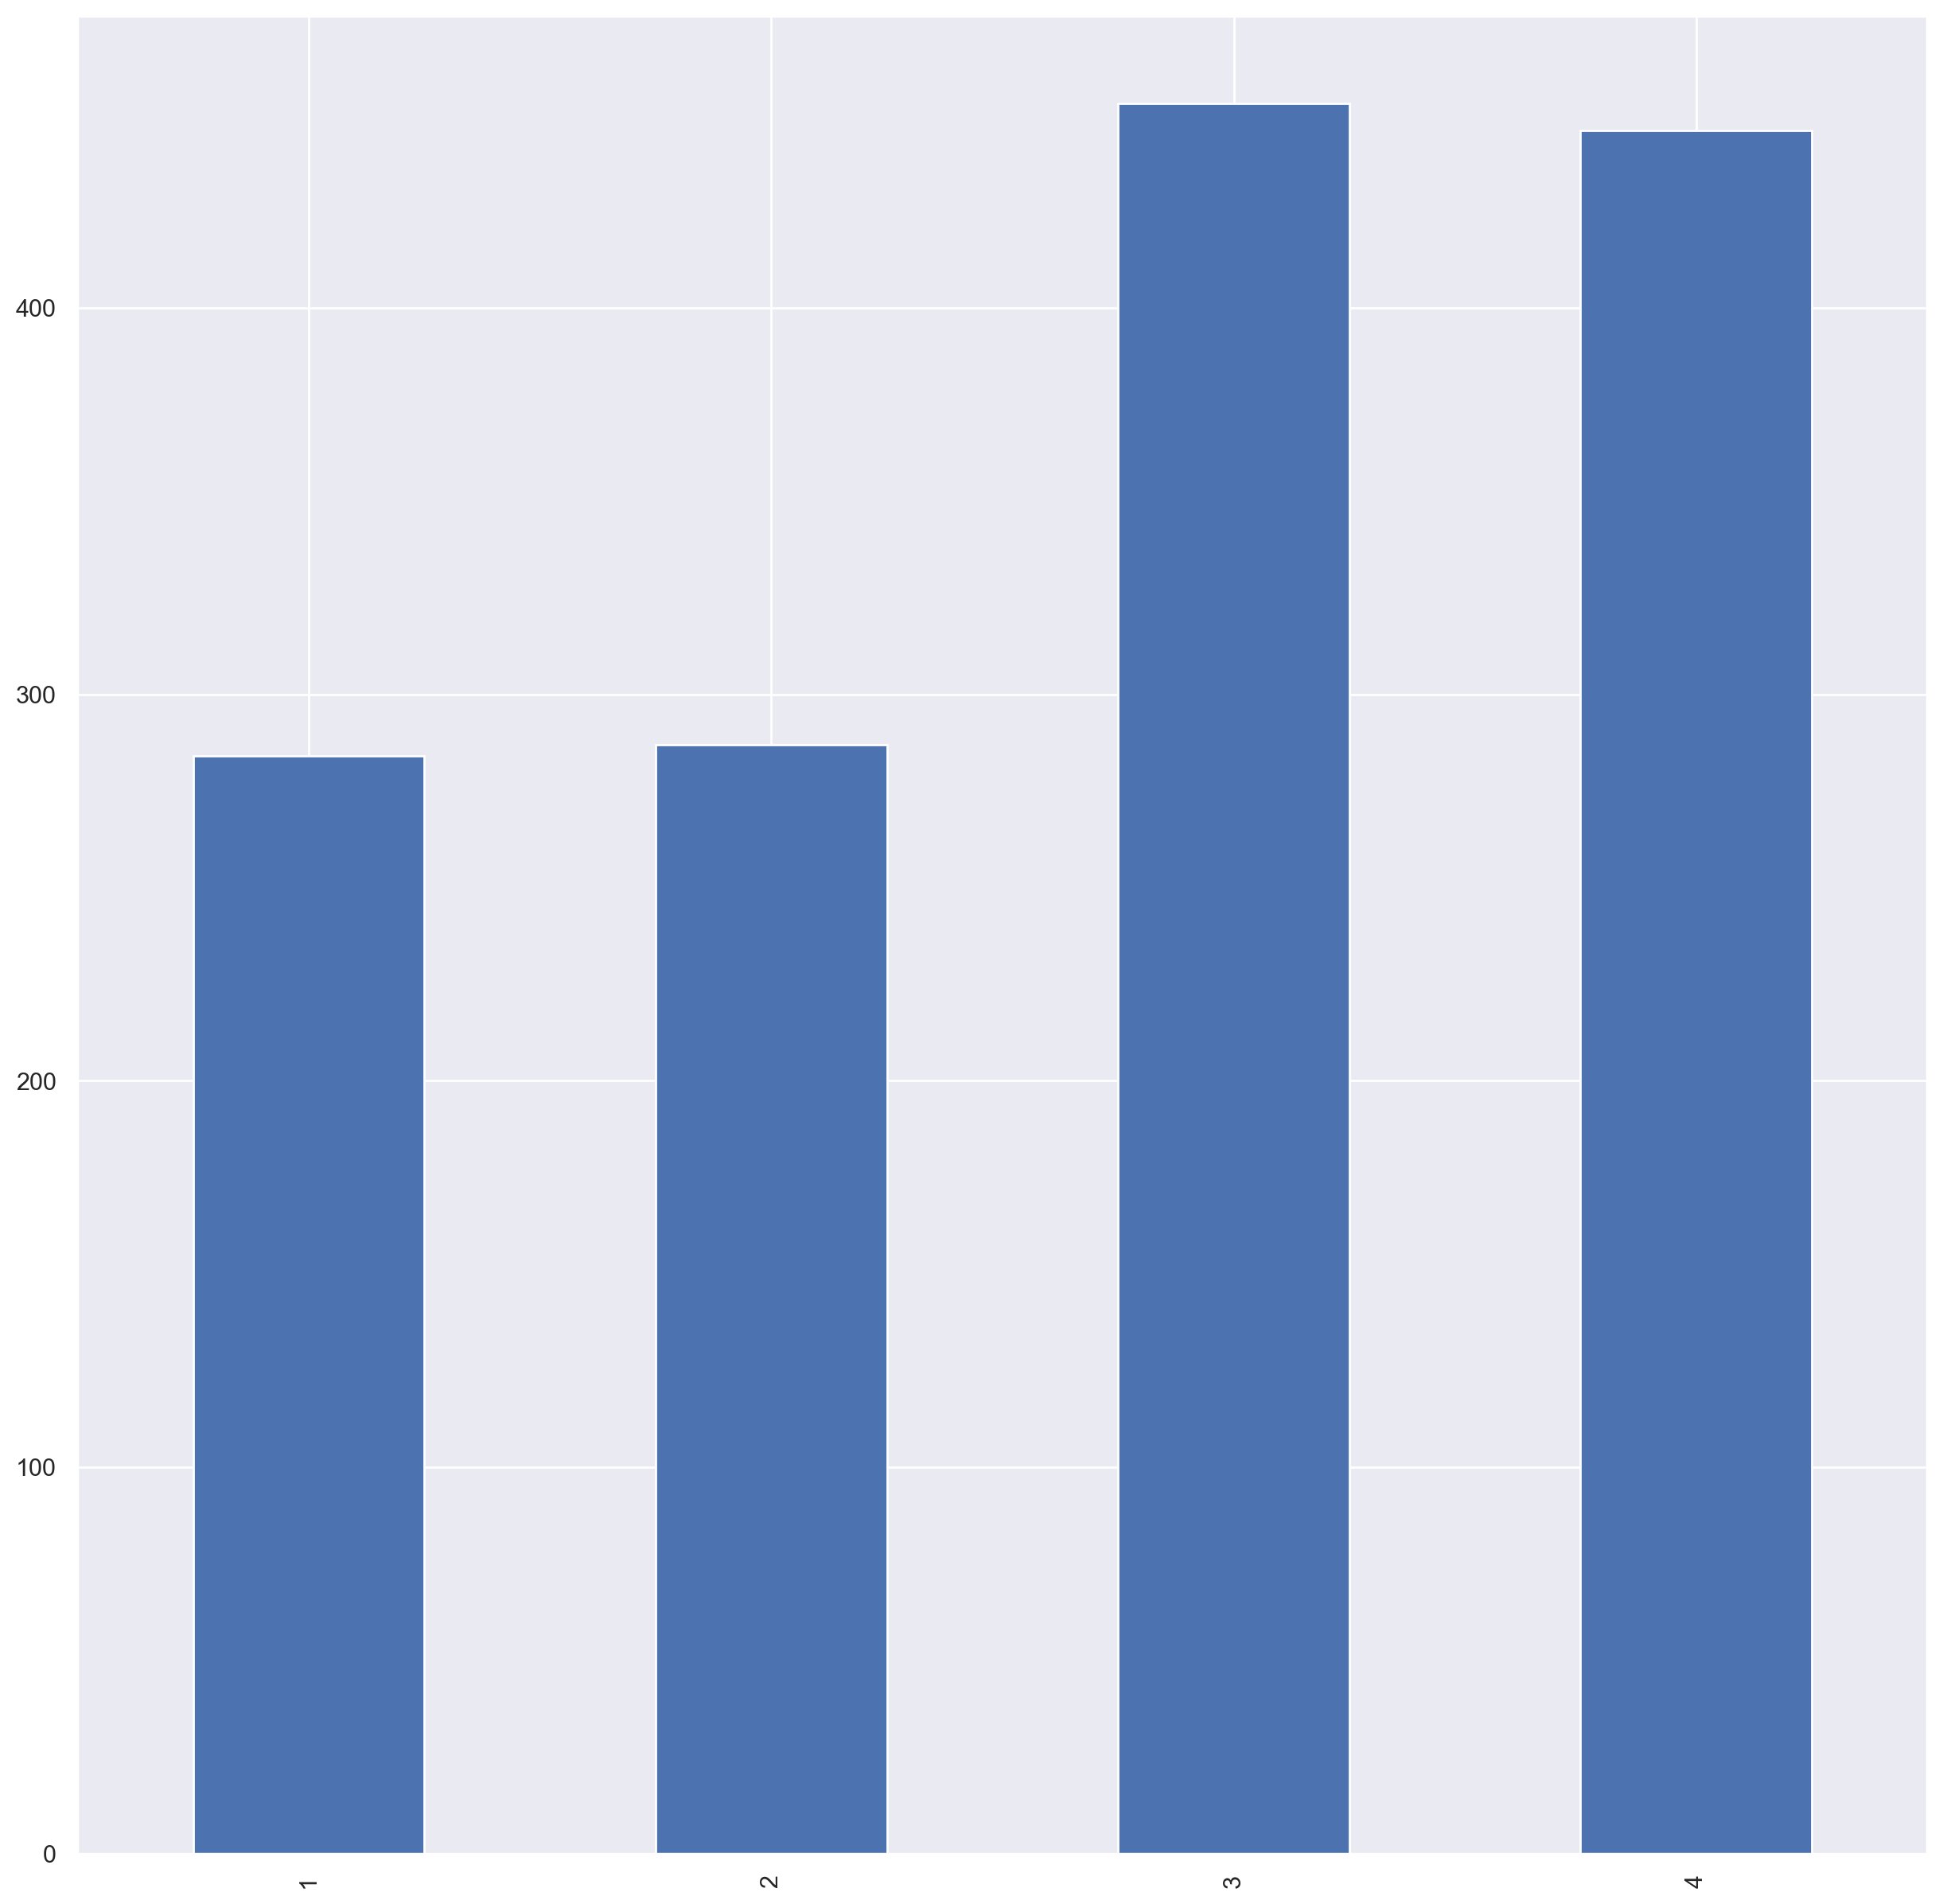

In [104]:
print(df.EnvironmentSatisfaction.value_counts())
df.EnvironmentSatisfaction.value_counts().sort_index().plot(kind='bar')

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


<Axes: >

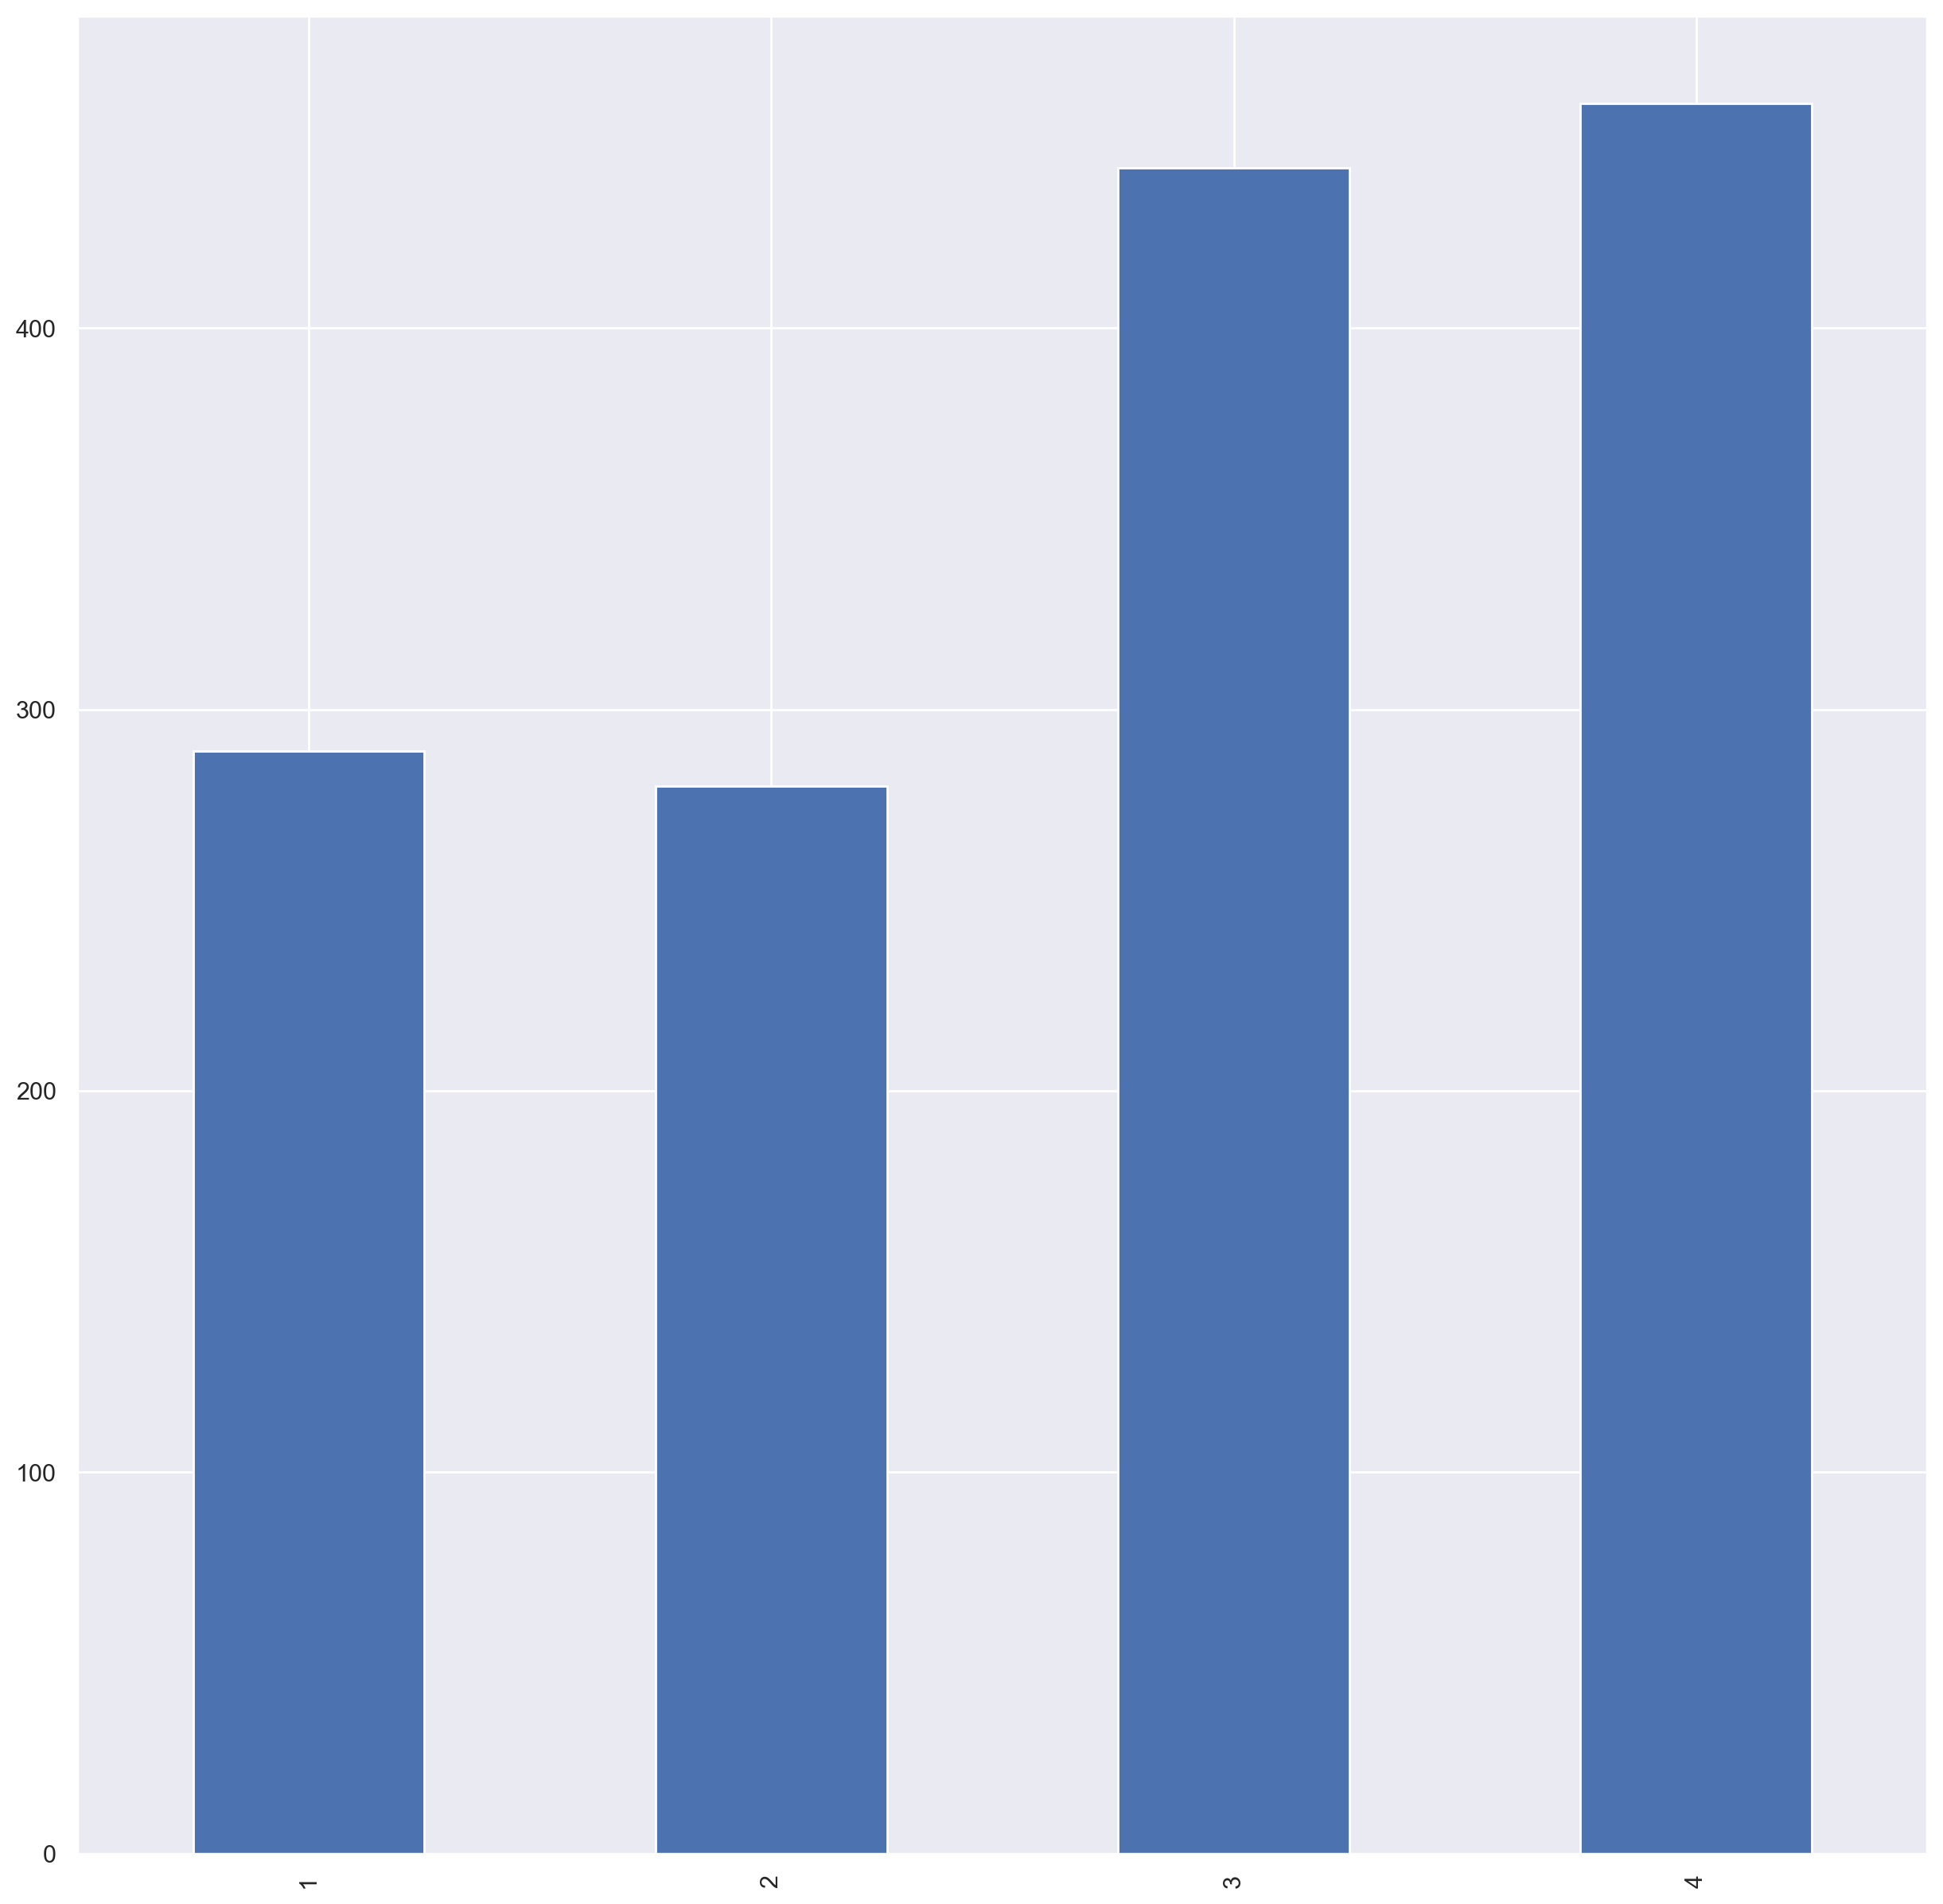

In [105]:
print(df.JobSatisfaction.value_counts())
df.JobSatisfaction.value_counts().sort_index().plot(kind='bar')

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


<Axes: >

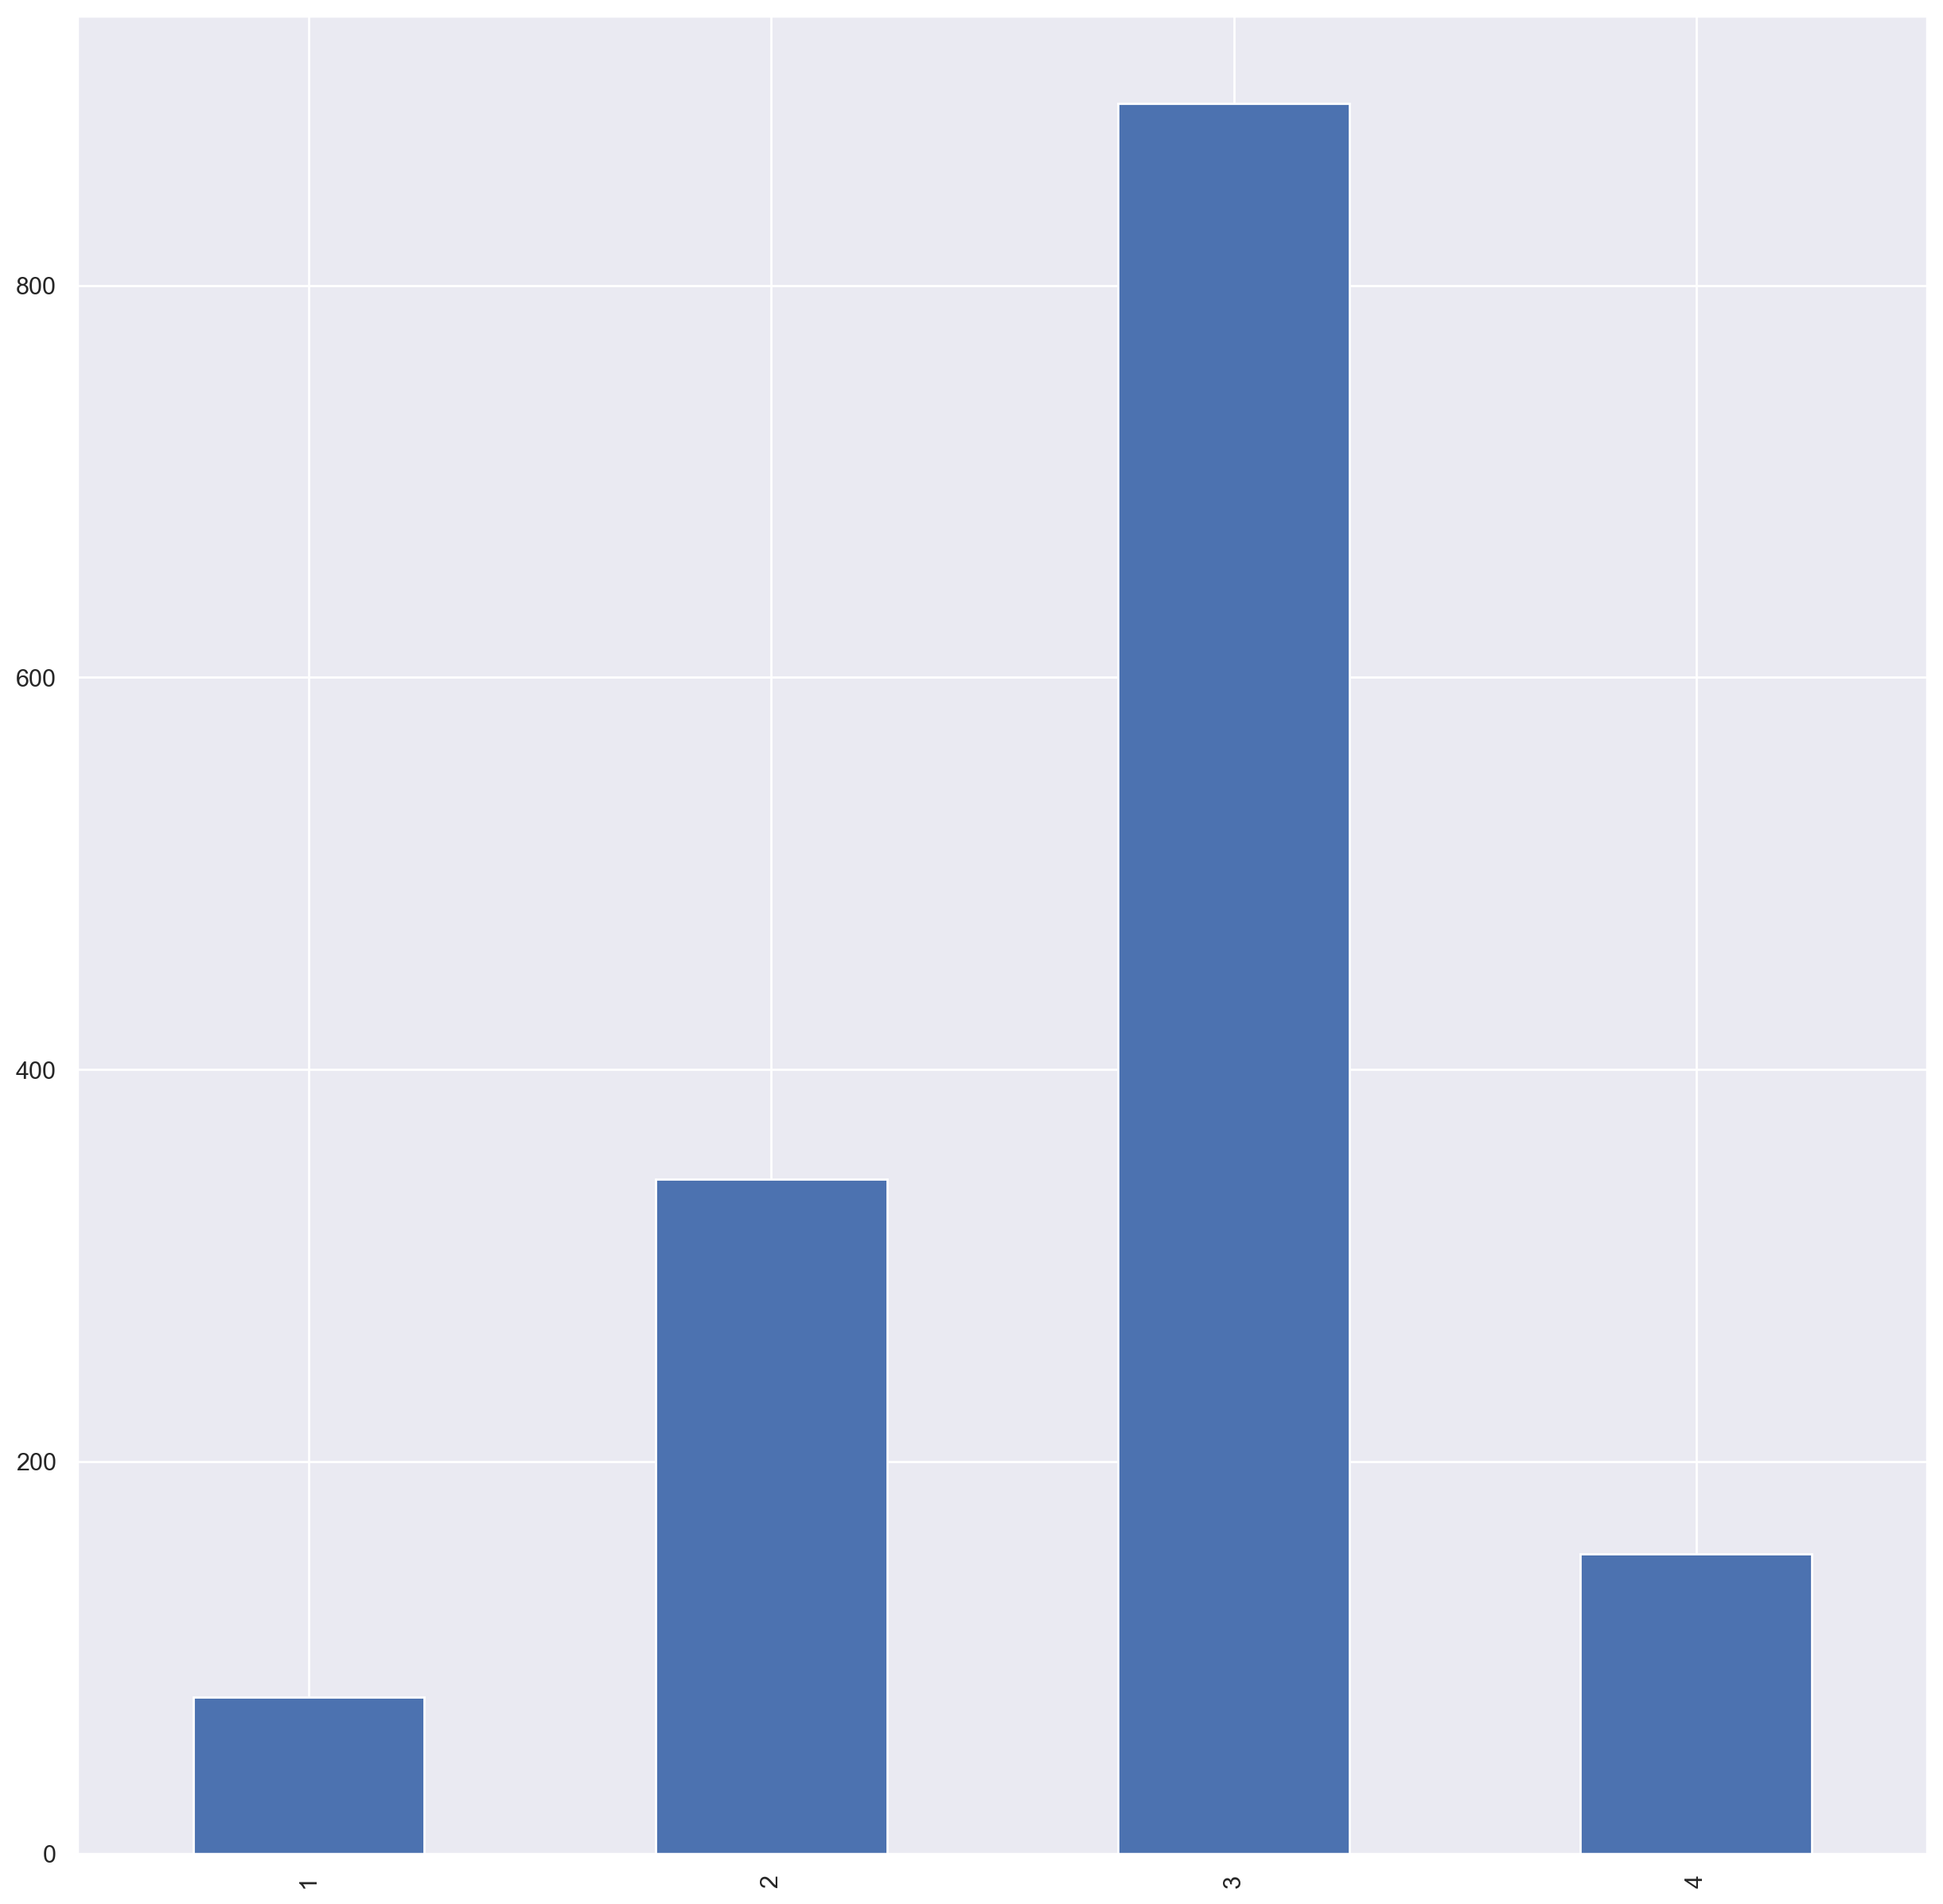

In [106]:
print(df.WorkLifeBalance.value_counts())
df.WorkLifeBalance.value_counts().sort_index().plot(kind='bar')

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<Axes: >

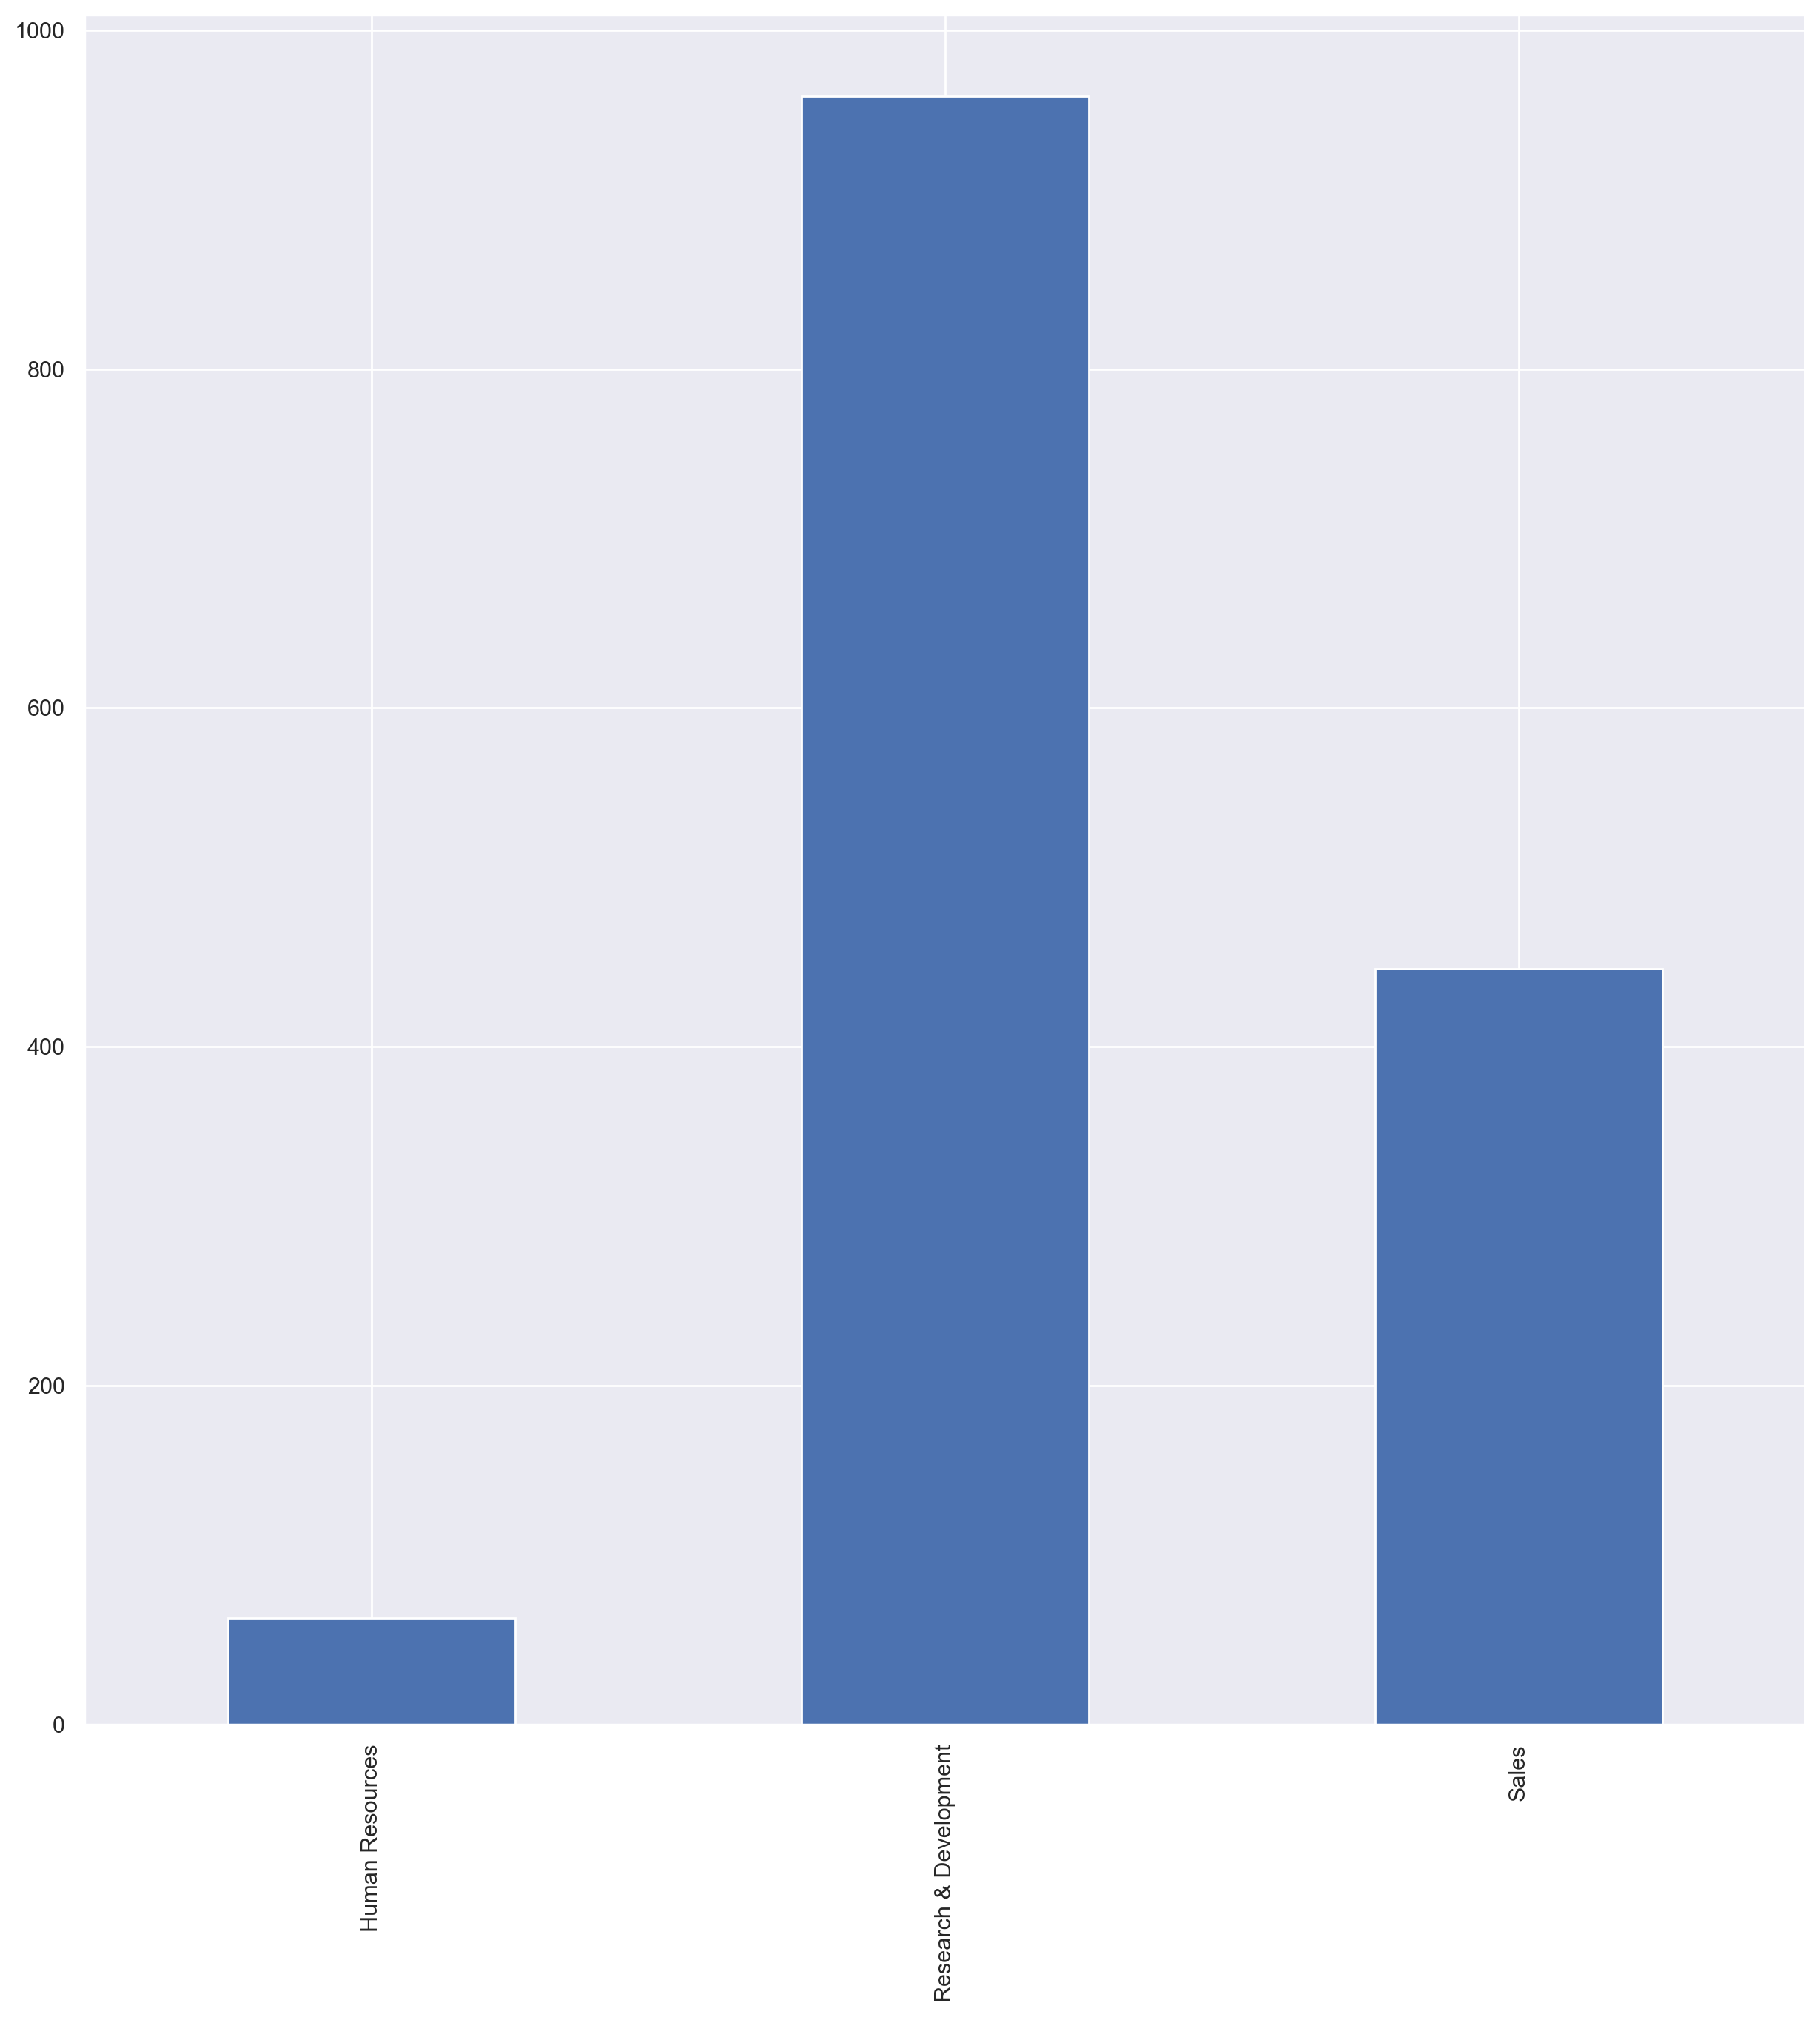

In [107]:
print(df.Department.value_counts())
df.Department.value_counts().sort_index().plot(kind='bar')

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


<Axes: >

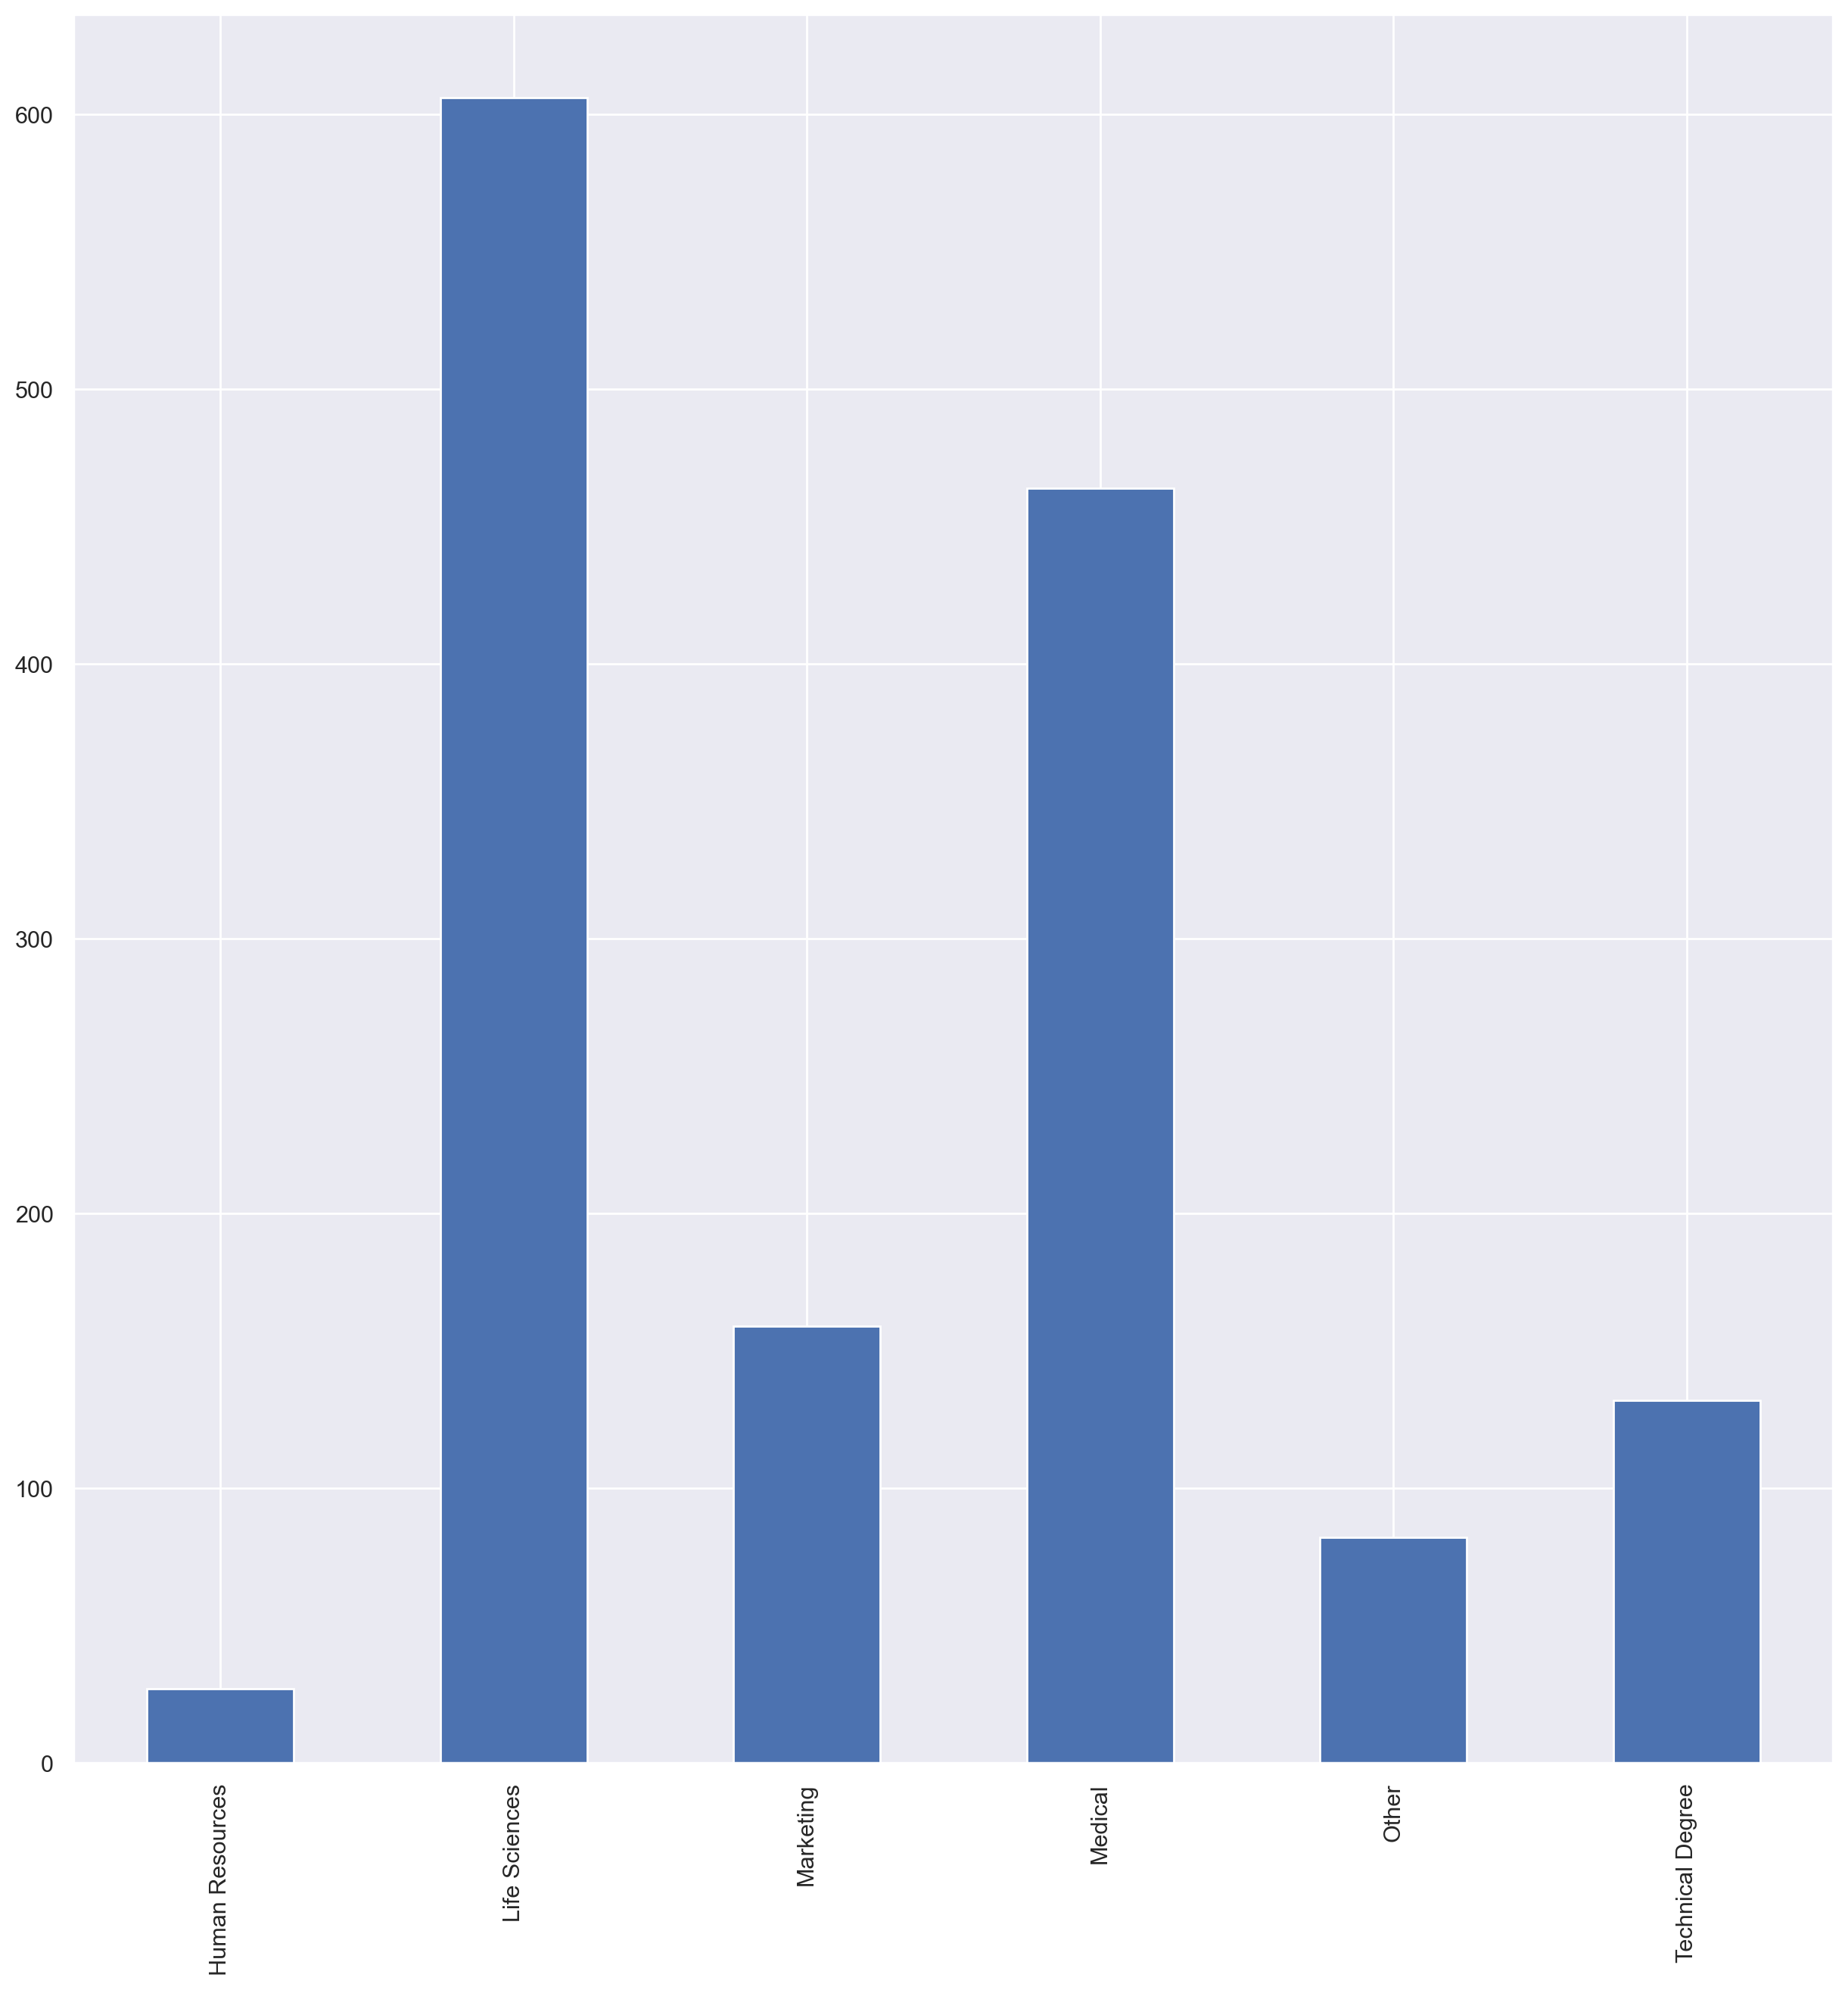

In [108]:
print(df.EducationField.value_counts())
df.EducationField.value_counts().sort_index().plot(kind='bar')

In [109]:
df1 = pd.get_dummies(df, ['Department', 'EducationField', 'MaritalStatus'])

<Axes: >

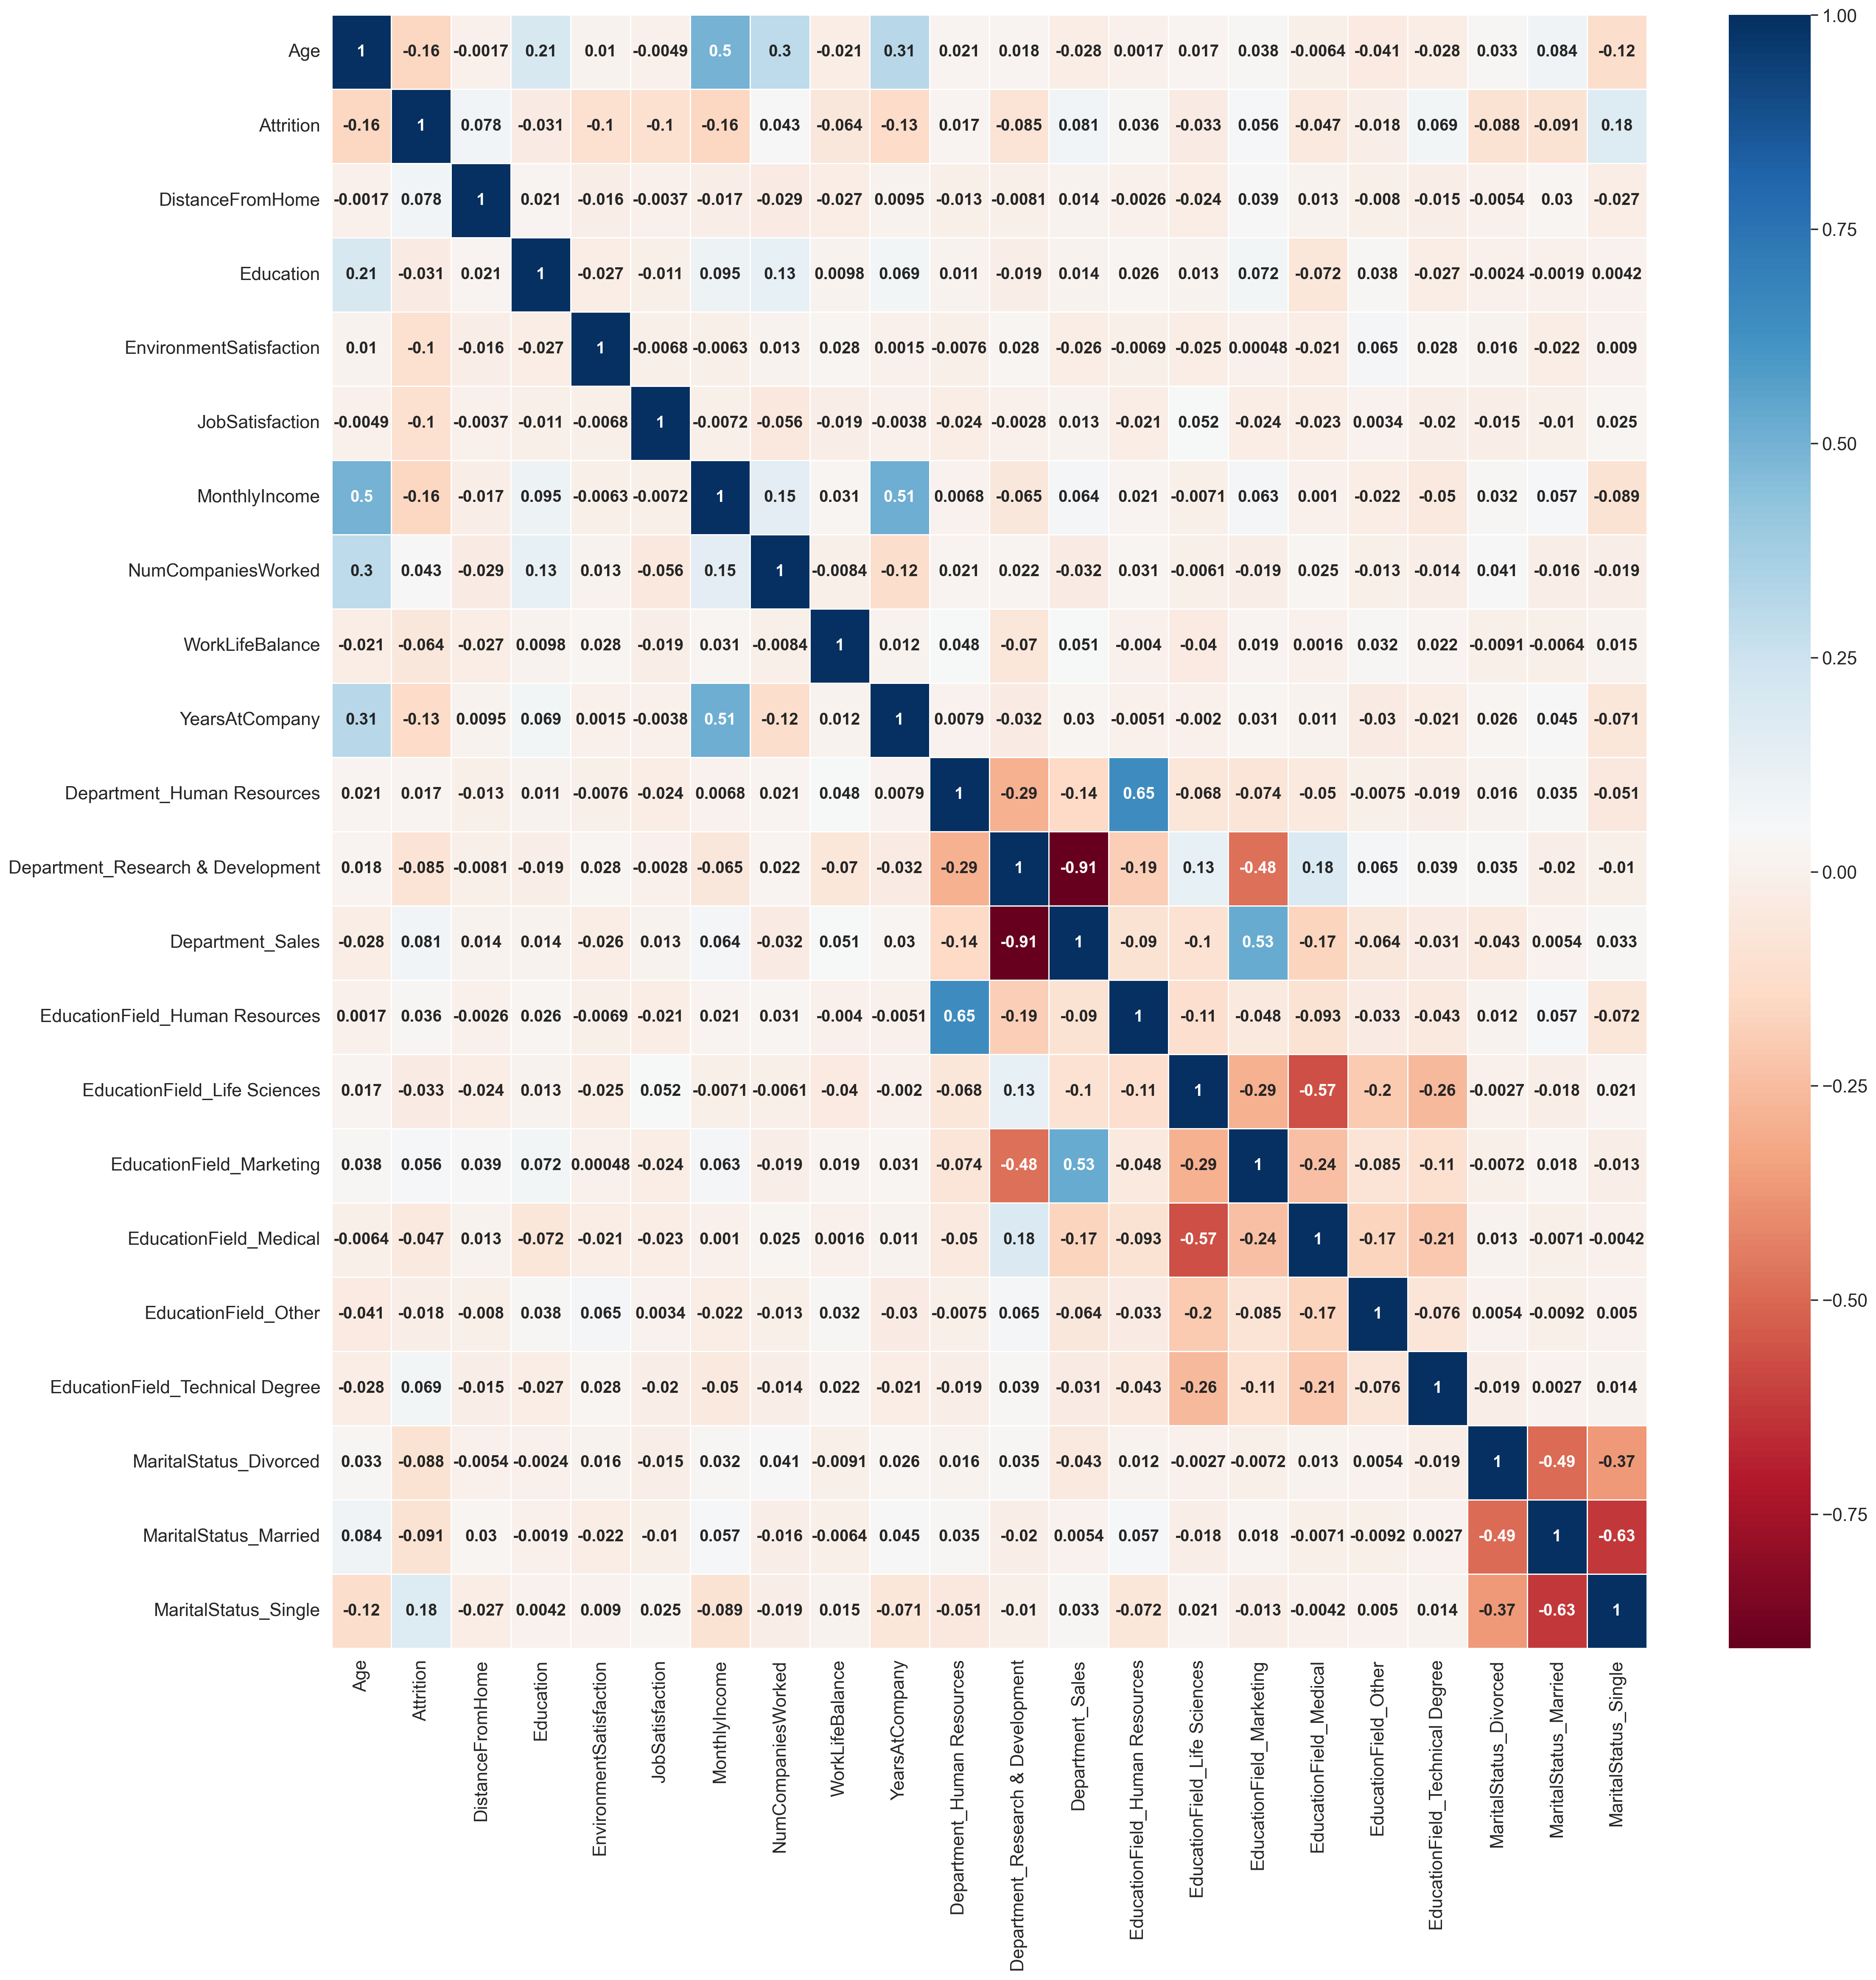

In [110]:
sns.set(rc={'figure.figsize':(25,25)})
sns.set(font_scale=1.4)
sns.heatmap(df1.corr(), 
            annot=True,
            linewidth=0.5,
            annot_kws={"size":14, "weight": "bold"},
            cmap="RdBu")


## What explains Monthly Income?

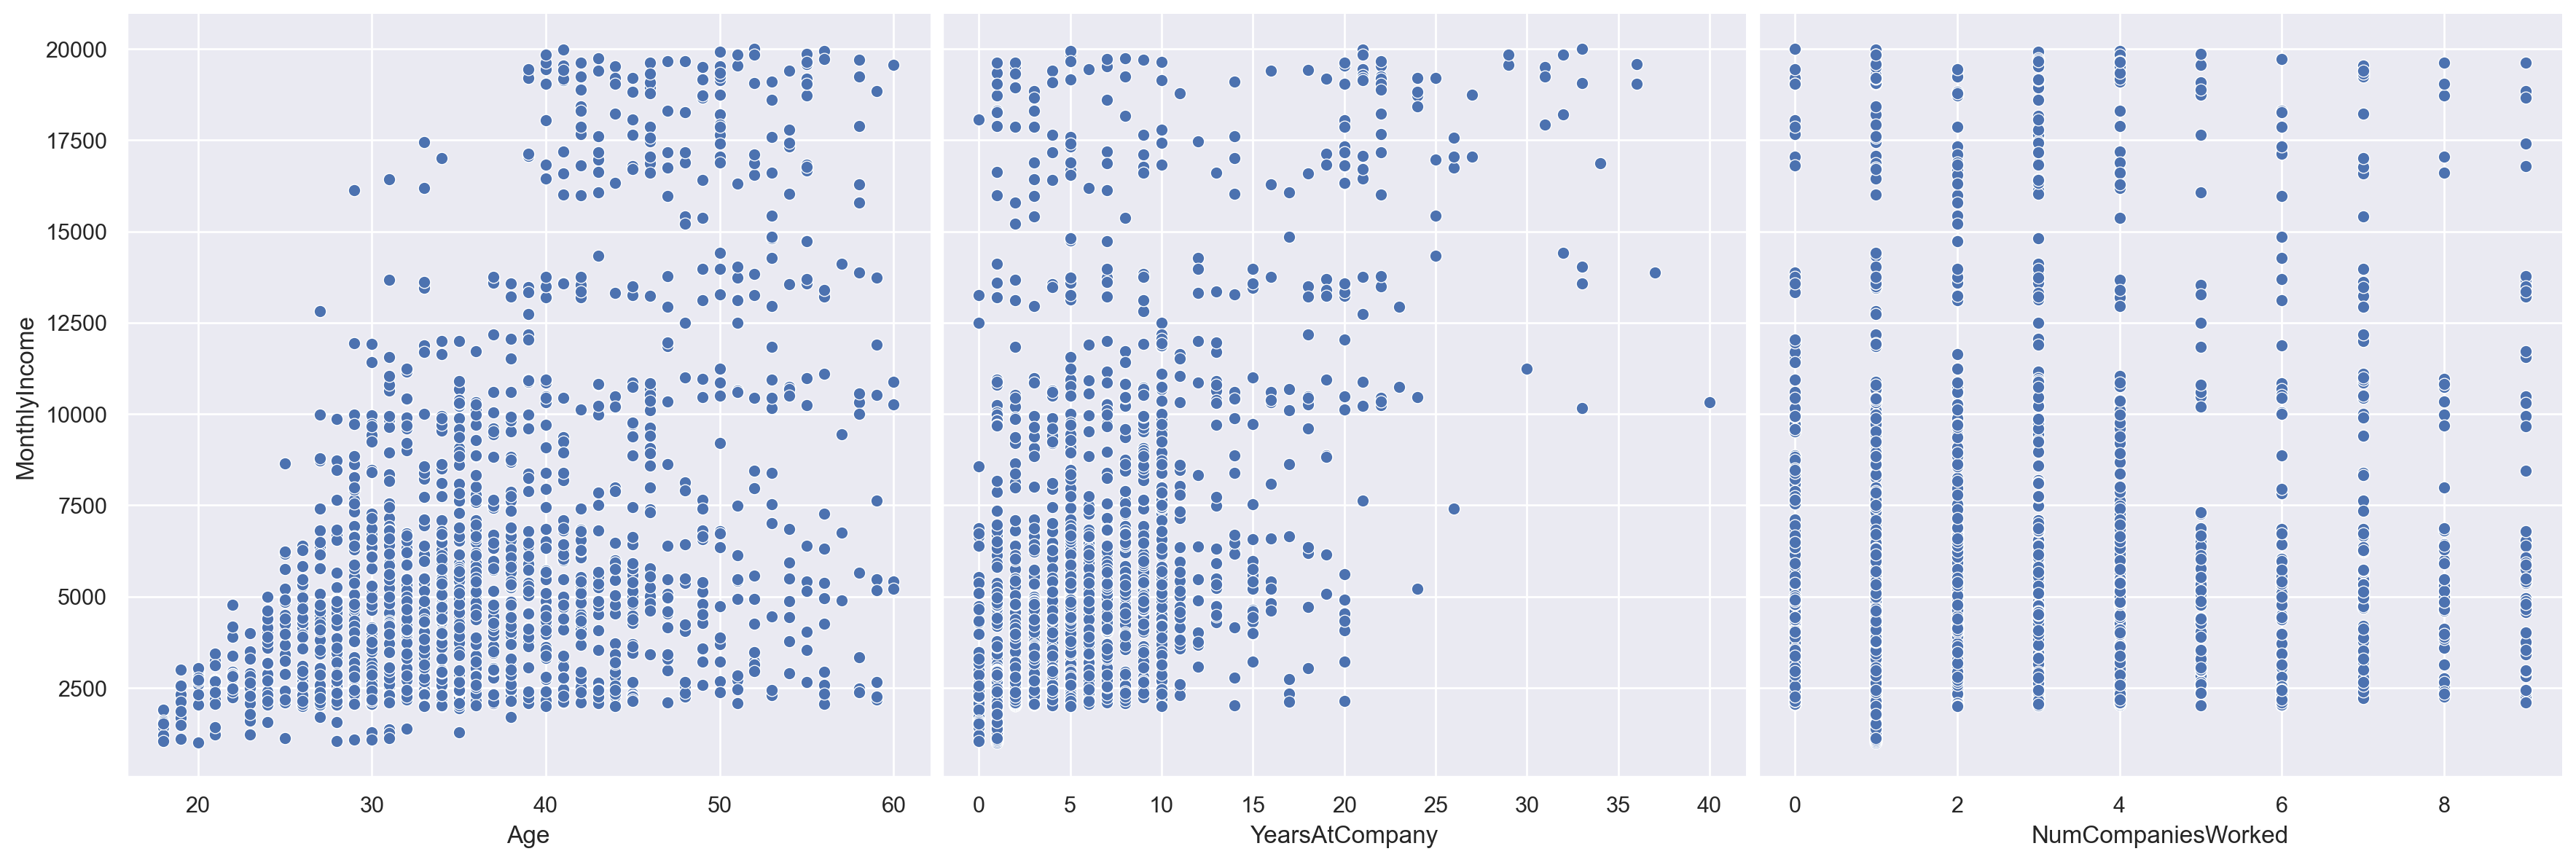

In [111]:
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(df,x_vars=['Age','YearsAtCompany','NumCompaniesWorked'],
             y_vars=['MonthlyIncome'],
            height=6)

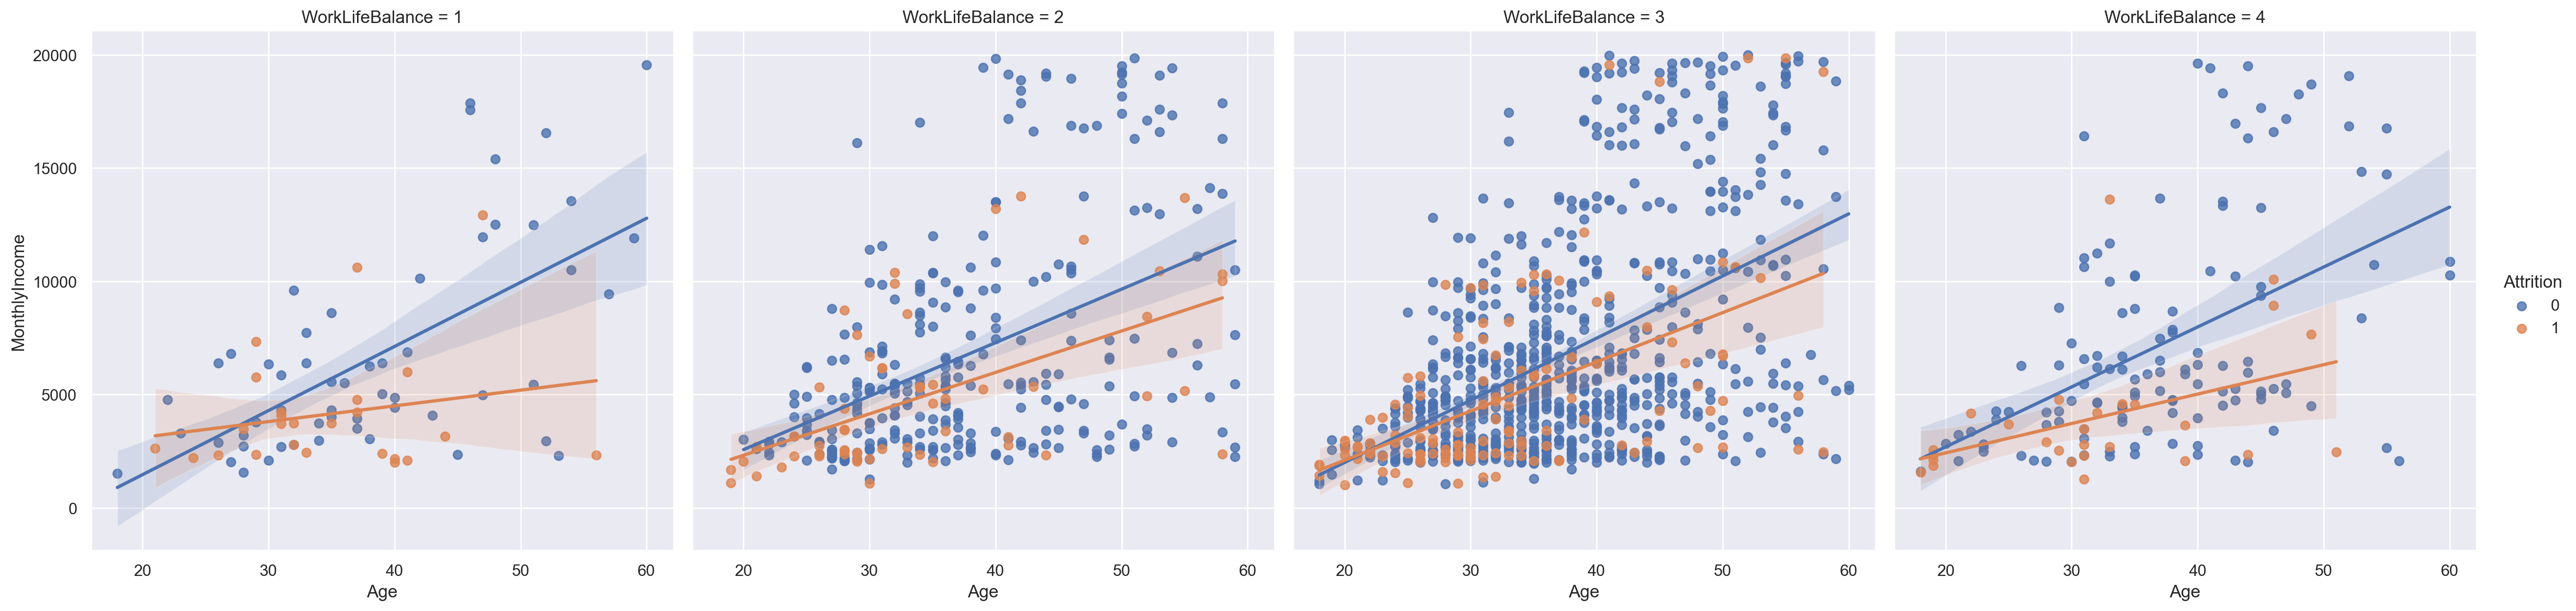

In [112]:
sns.set(rc={'figure.figsize':(15,15)})
sns.lmplot(x="Age", y="MonthlyIncome", data=df, col="WorkLifeBalance", hue="Attrition", height=6)


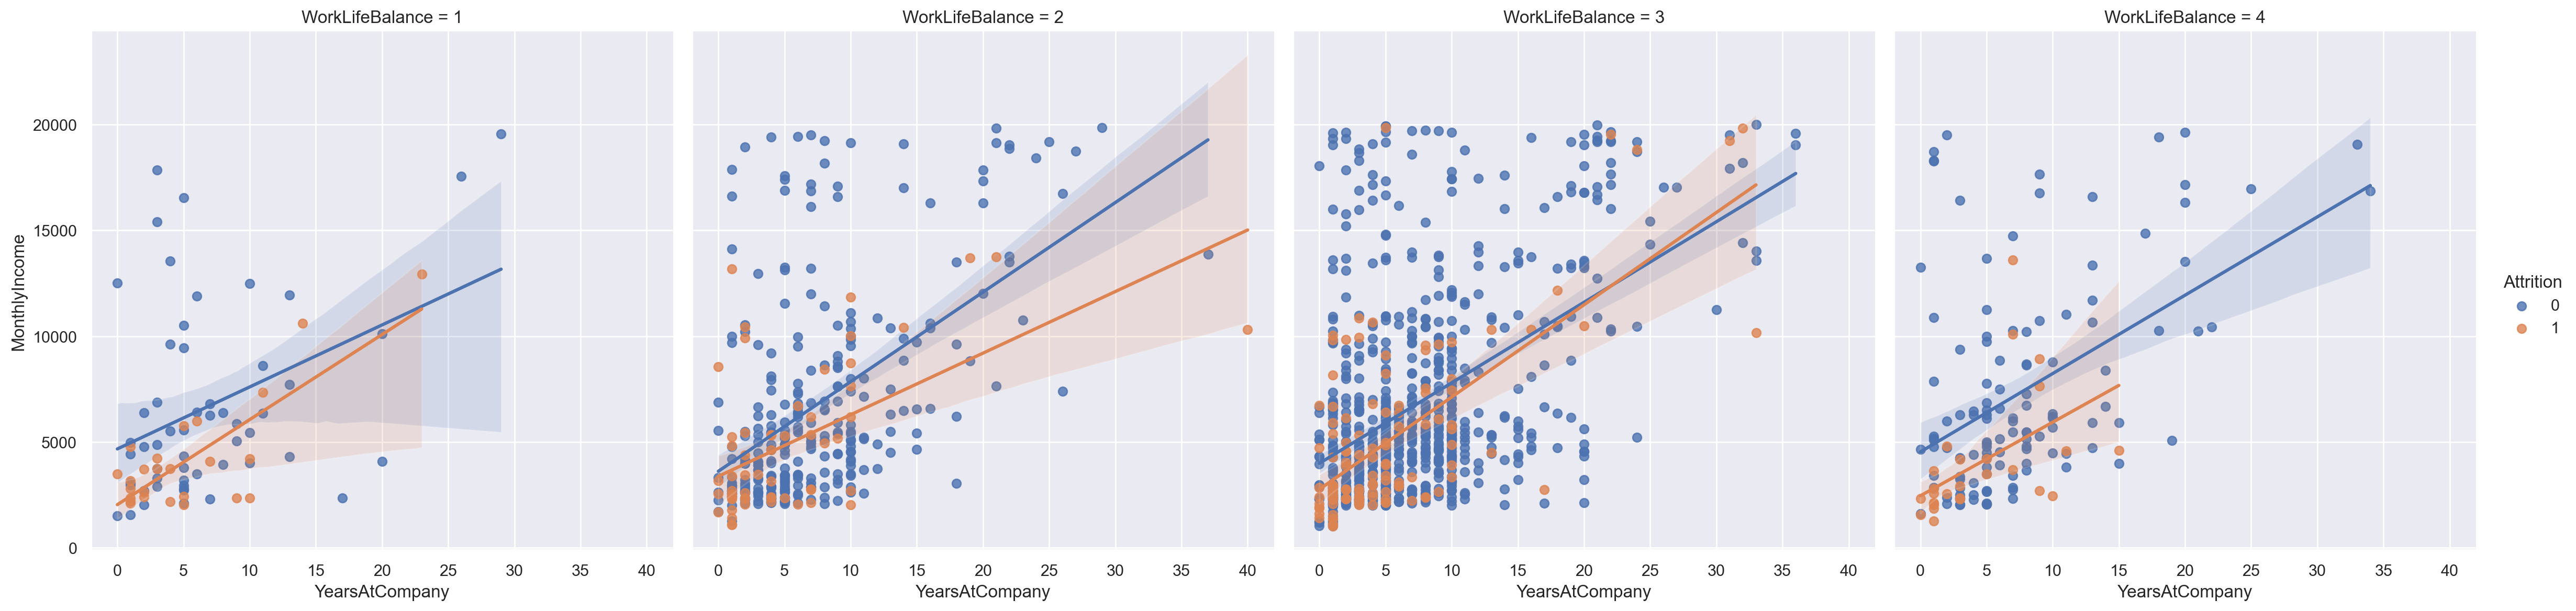

In [113]:
sns.set(rc={'figure.figsize':(15,15)})
sns.lmplot(x="YearsAtCompany", y="MonthlyIncome", data=df, col="WorkLifeBalance", hue="Attrition", height=6);

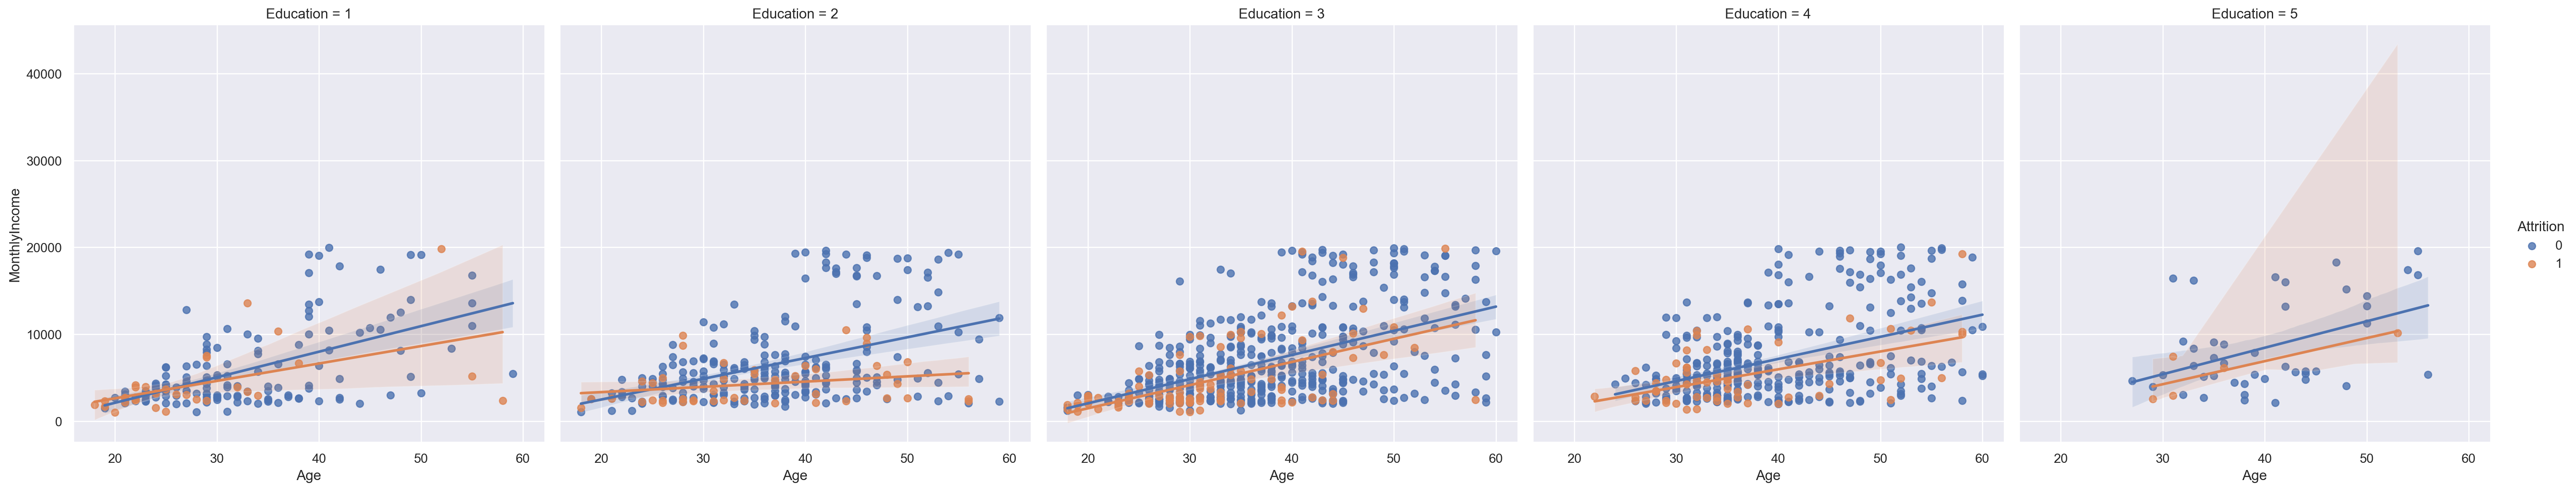

In [114]:
sns.set(rc={'figure.figsize':(15,15)})
sns.lmplot(x="Age", y="MonthlyIncome", data=df, col="Education", hue="Attrition", height=6);

## What explains Attrition?


In [115]:
# Correleation of Attrition with everything else (sorted in desceding order of corr values)
df1.corrwith(df1['Attrition']).sort_values(ascending=False)

Attrition                            1.000000
MaritalStatus_Single                 0.175419
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
Department_Human Resources           0.016832
EducationField_Other                -0.017898
Education                           -0.031373
EducationField_Life Sciences        -0.032703
EducationField_Medical              -0.046999
WorkLifeBalance                     -0.063939
Department_Research & Development   -0.085293
MaritalStatus_Divorced              -0.087716
MaritalStatus_Married               -0.090984
EnvironmentSatisfaction             -0.103369
JobSatisfaction                     -0.103481
YearsAtCompany                      -0.134392
Age                                 -0.159205
MonthlyIncome                     

<Axes: xlabel='MaritalStatus', ylabel='Count'>

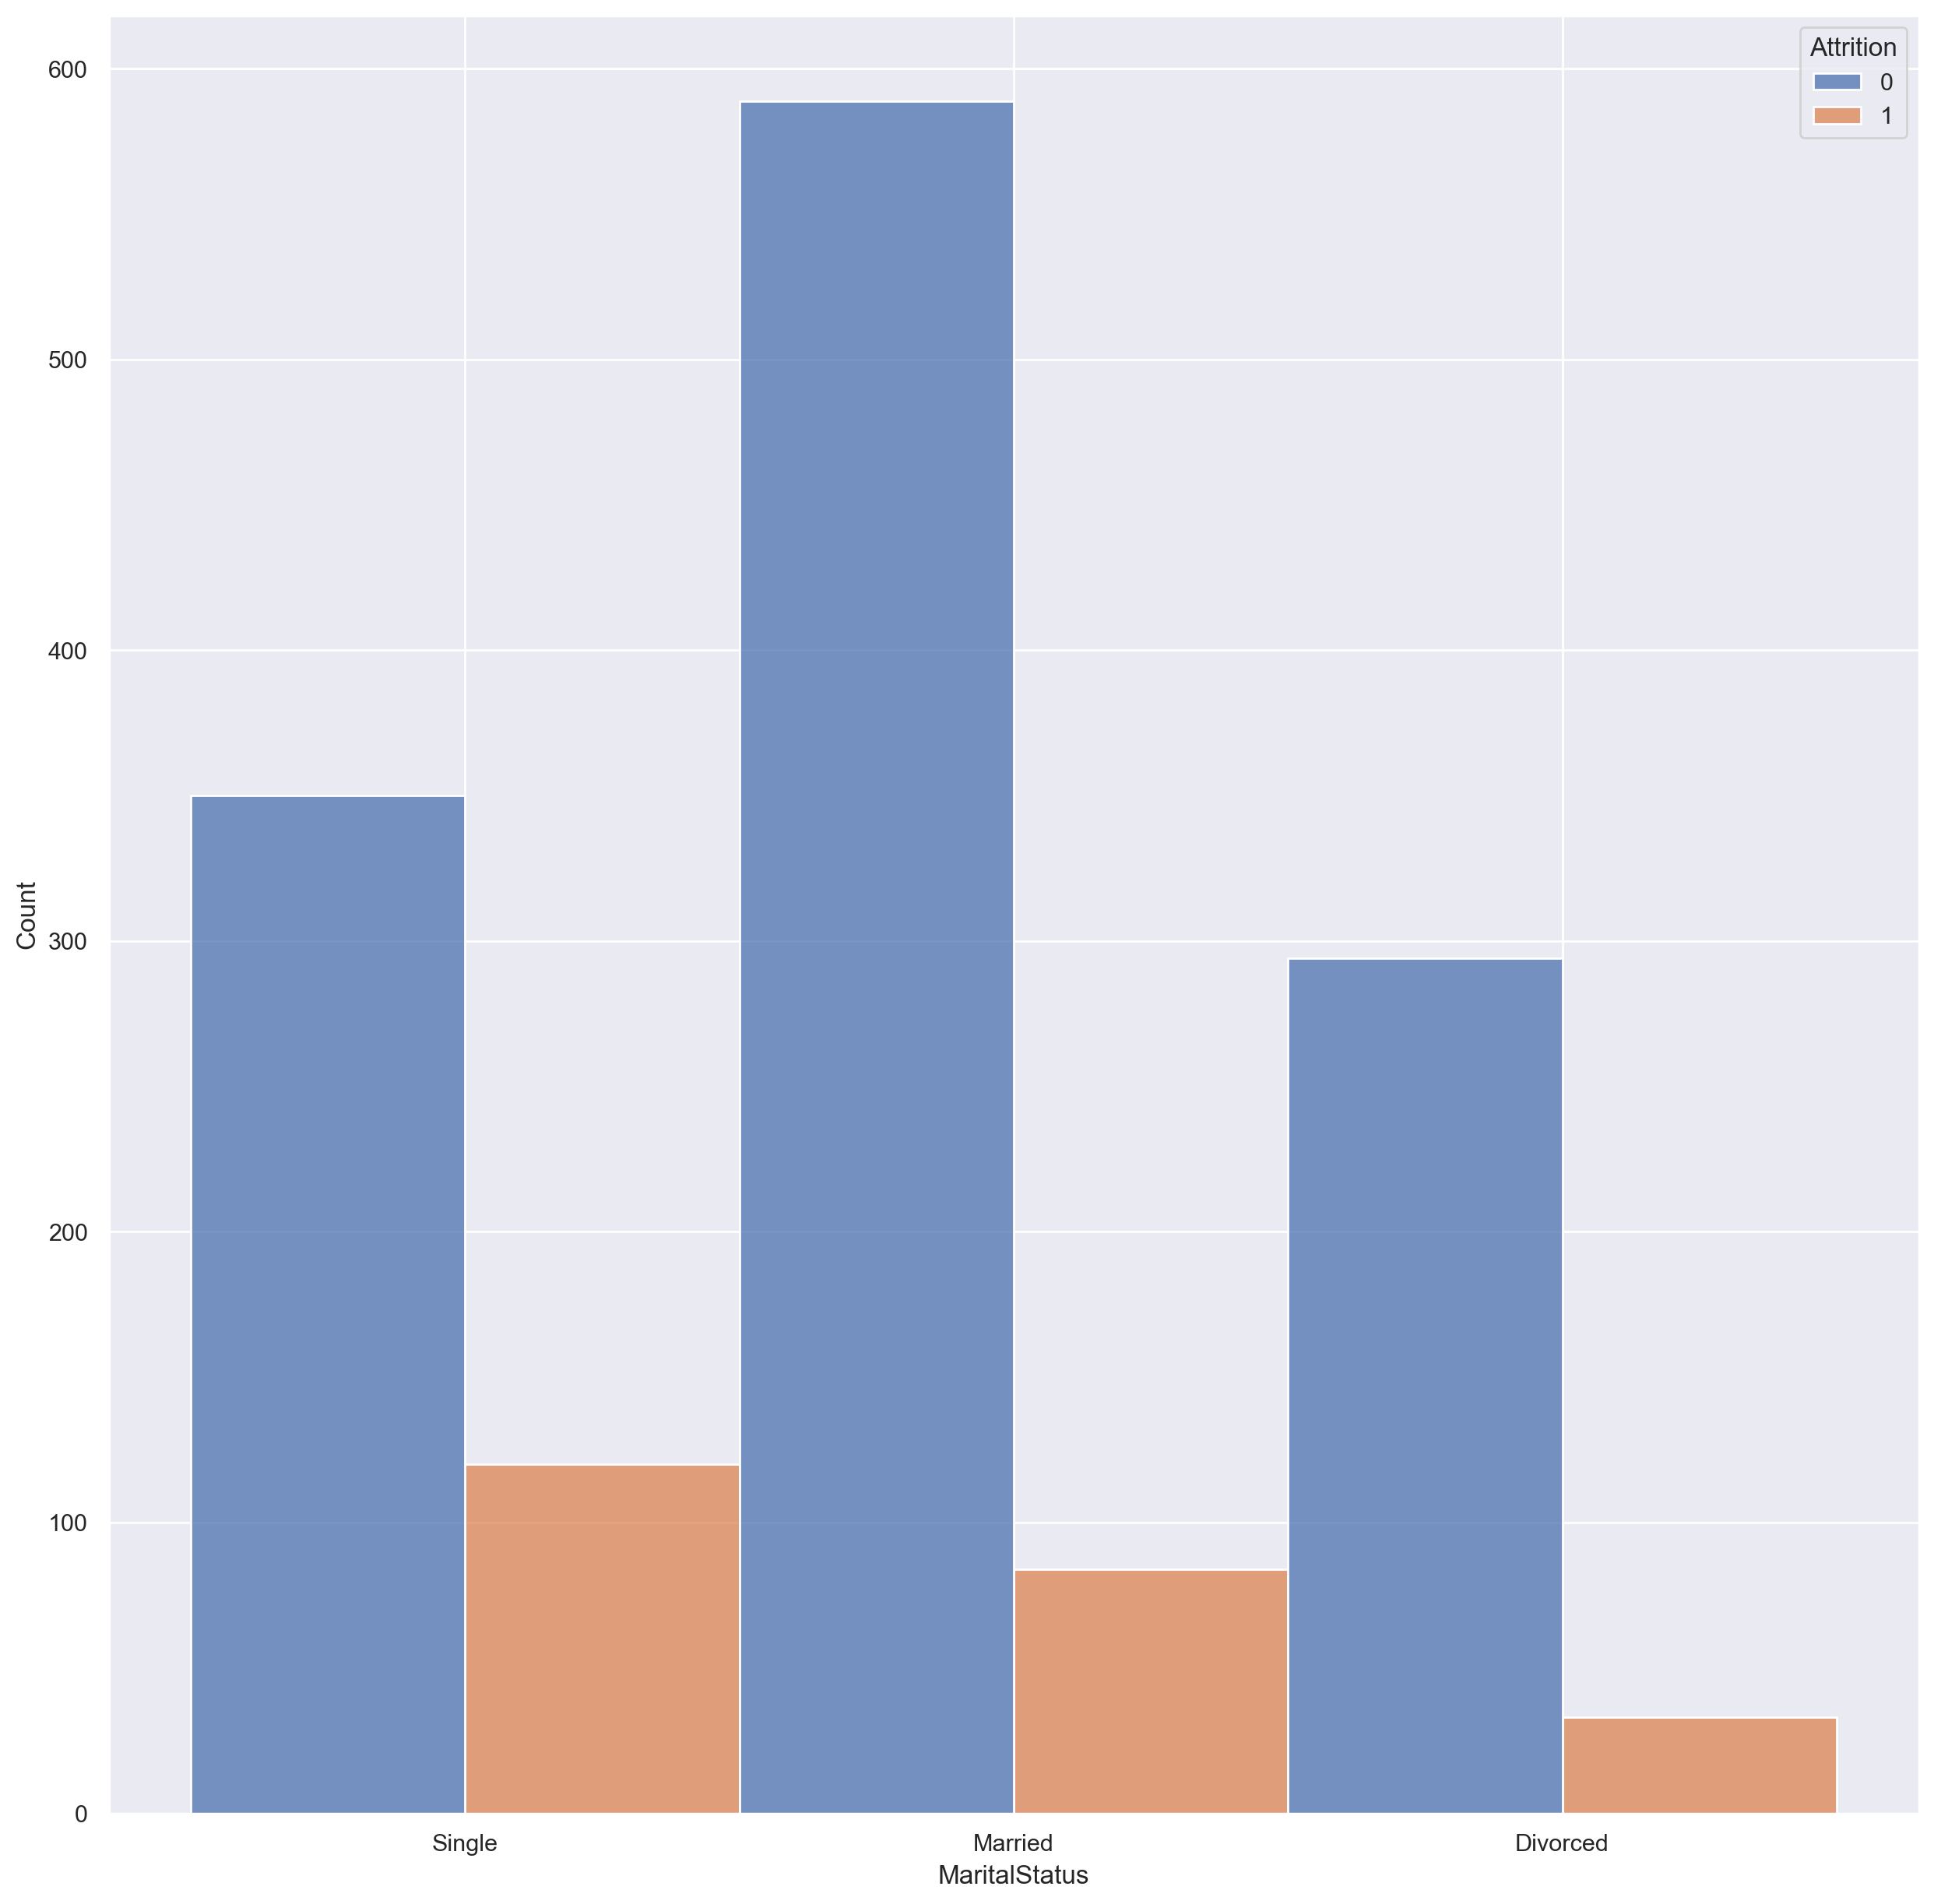

In [116]:
sns.histplot(data=df, x="MaritalStatus", hue="Attrition", multiple="dodge")

In [117]:
df.groupby(by=['MaritalStatus'])['Attrition'].mean().sort_values(ascending=False).reset_index()

MaritalStatus  Attrition
0        Single   0.255319
1       Married   0.124814
2      Divorced   0.100917

<Axes: xlabel='Department', ylabel='Count'>

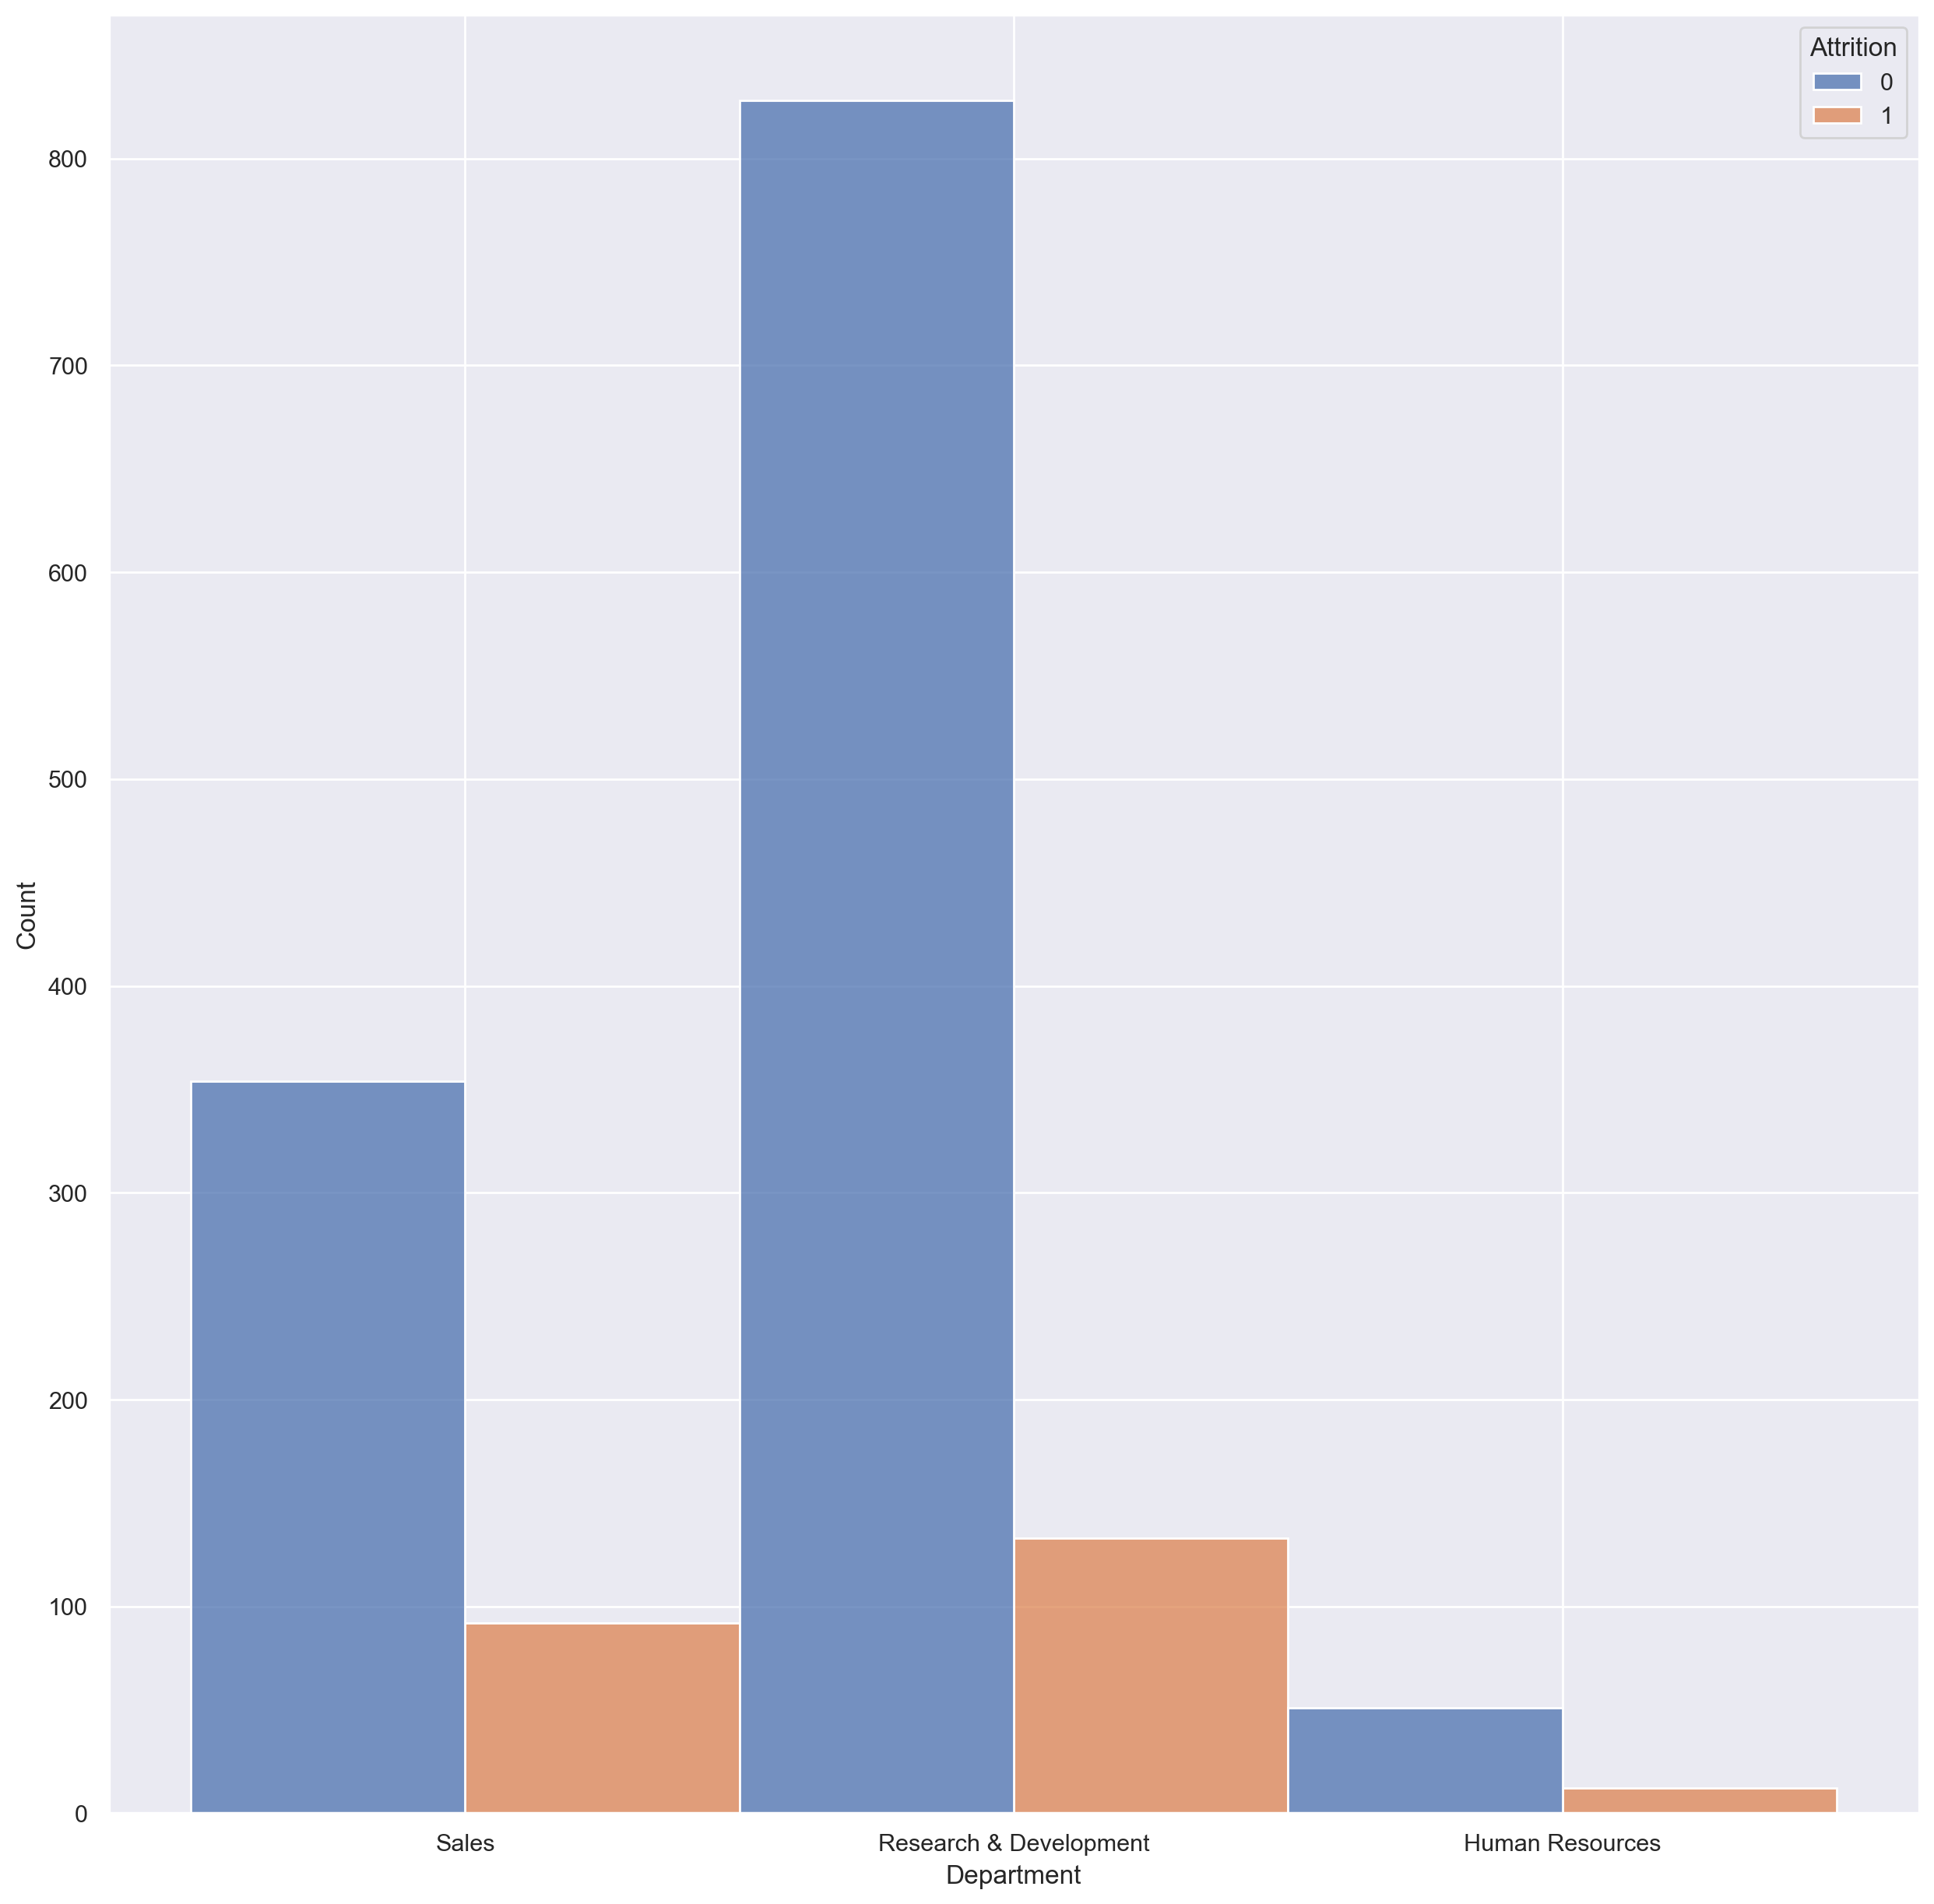

In [118]:
sns.histplot(data=df, x="Department", hue="Attrition", multiple="dodge")

In [119]:
df.groupby(by=['Department'])['Attrition'].mean().sort_values(ascending=False).reset_index()

Department  Attrition
0                   Sales   0.206278
1         Human Resources   0.190476
2  Research & Development   0.138398

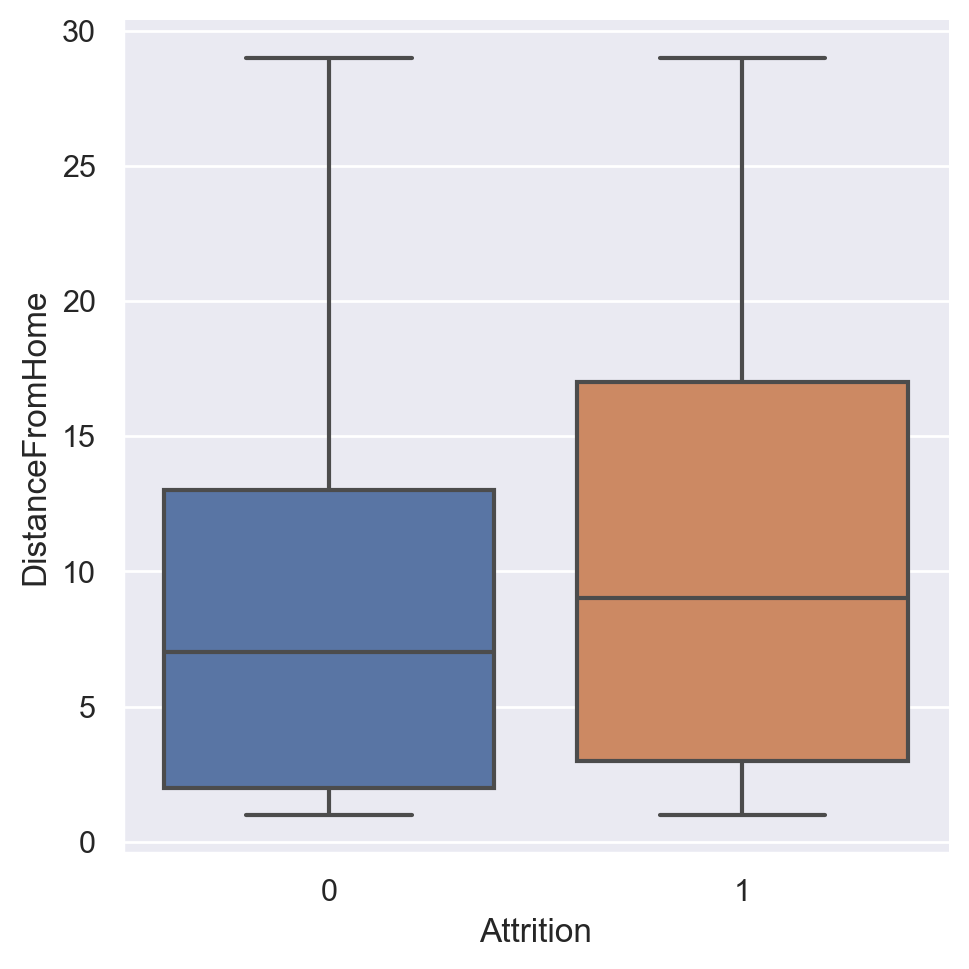

In [120]:
sns.catplot(data=df, x="Attrition", y="DistanceFromHome", kind="box")

<Axes: xlabel='EducationField', ylabel='Count'>

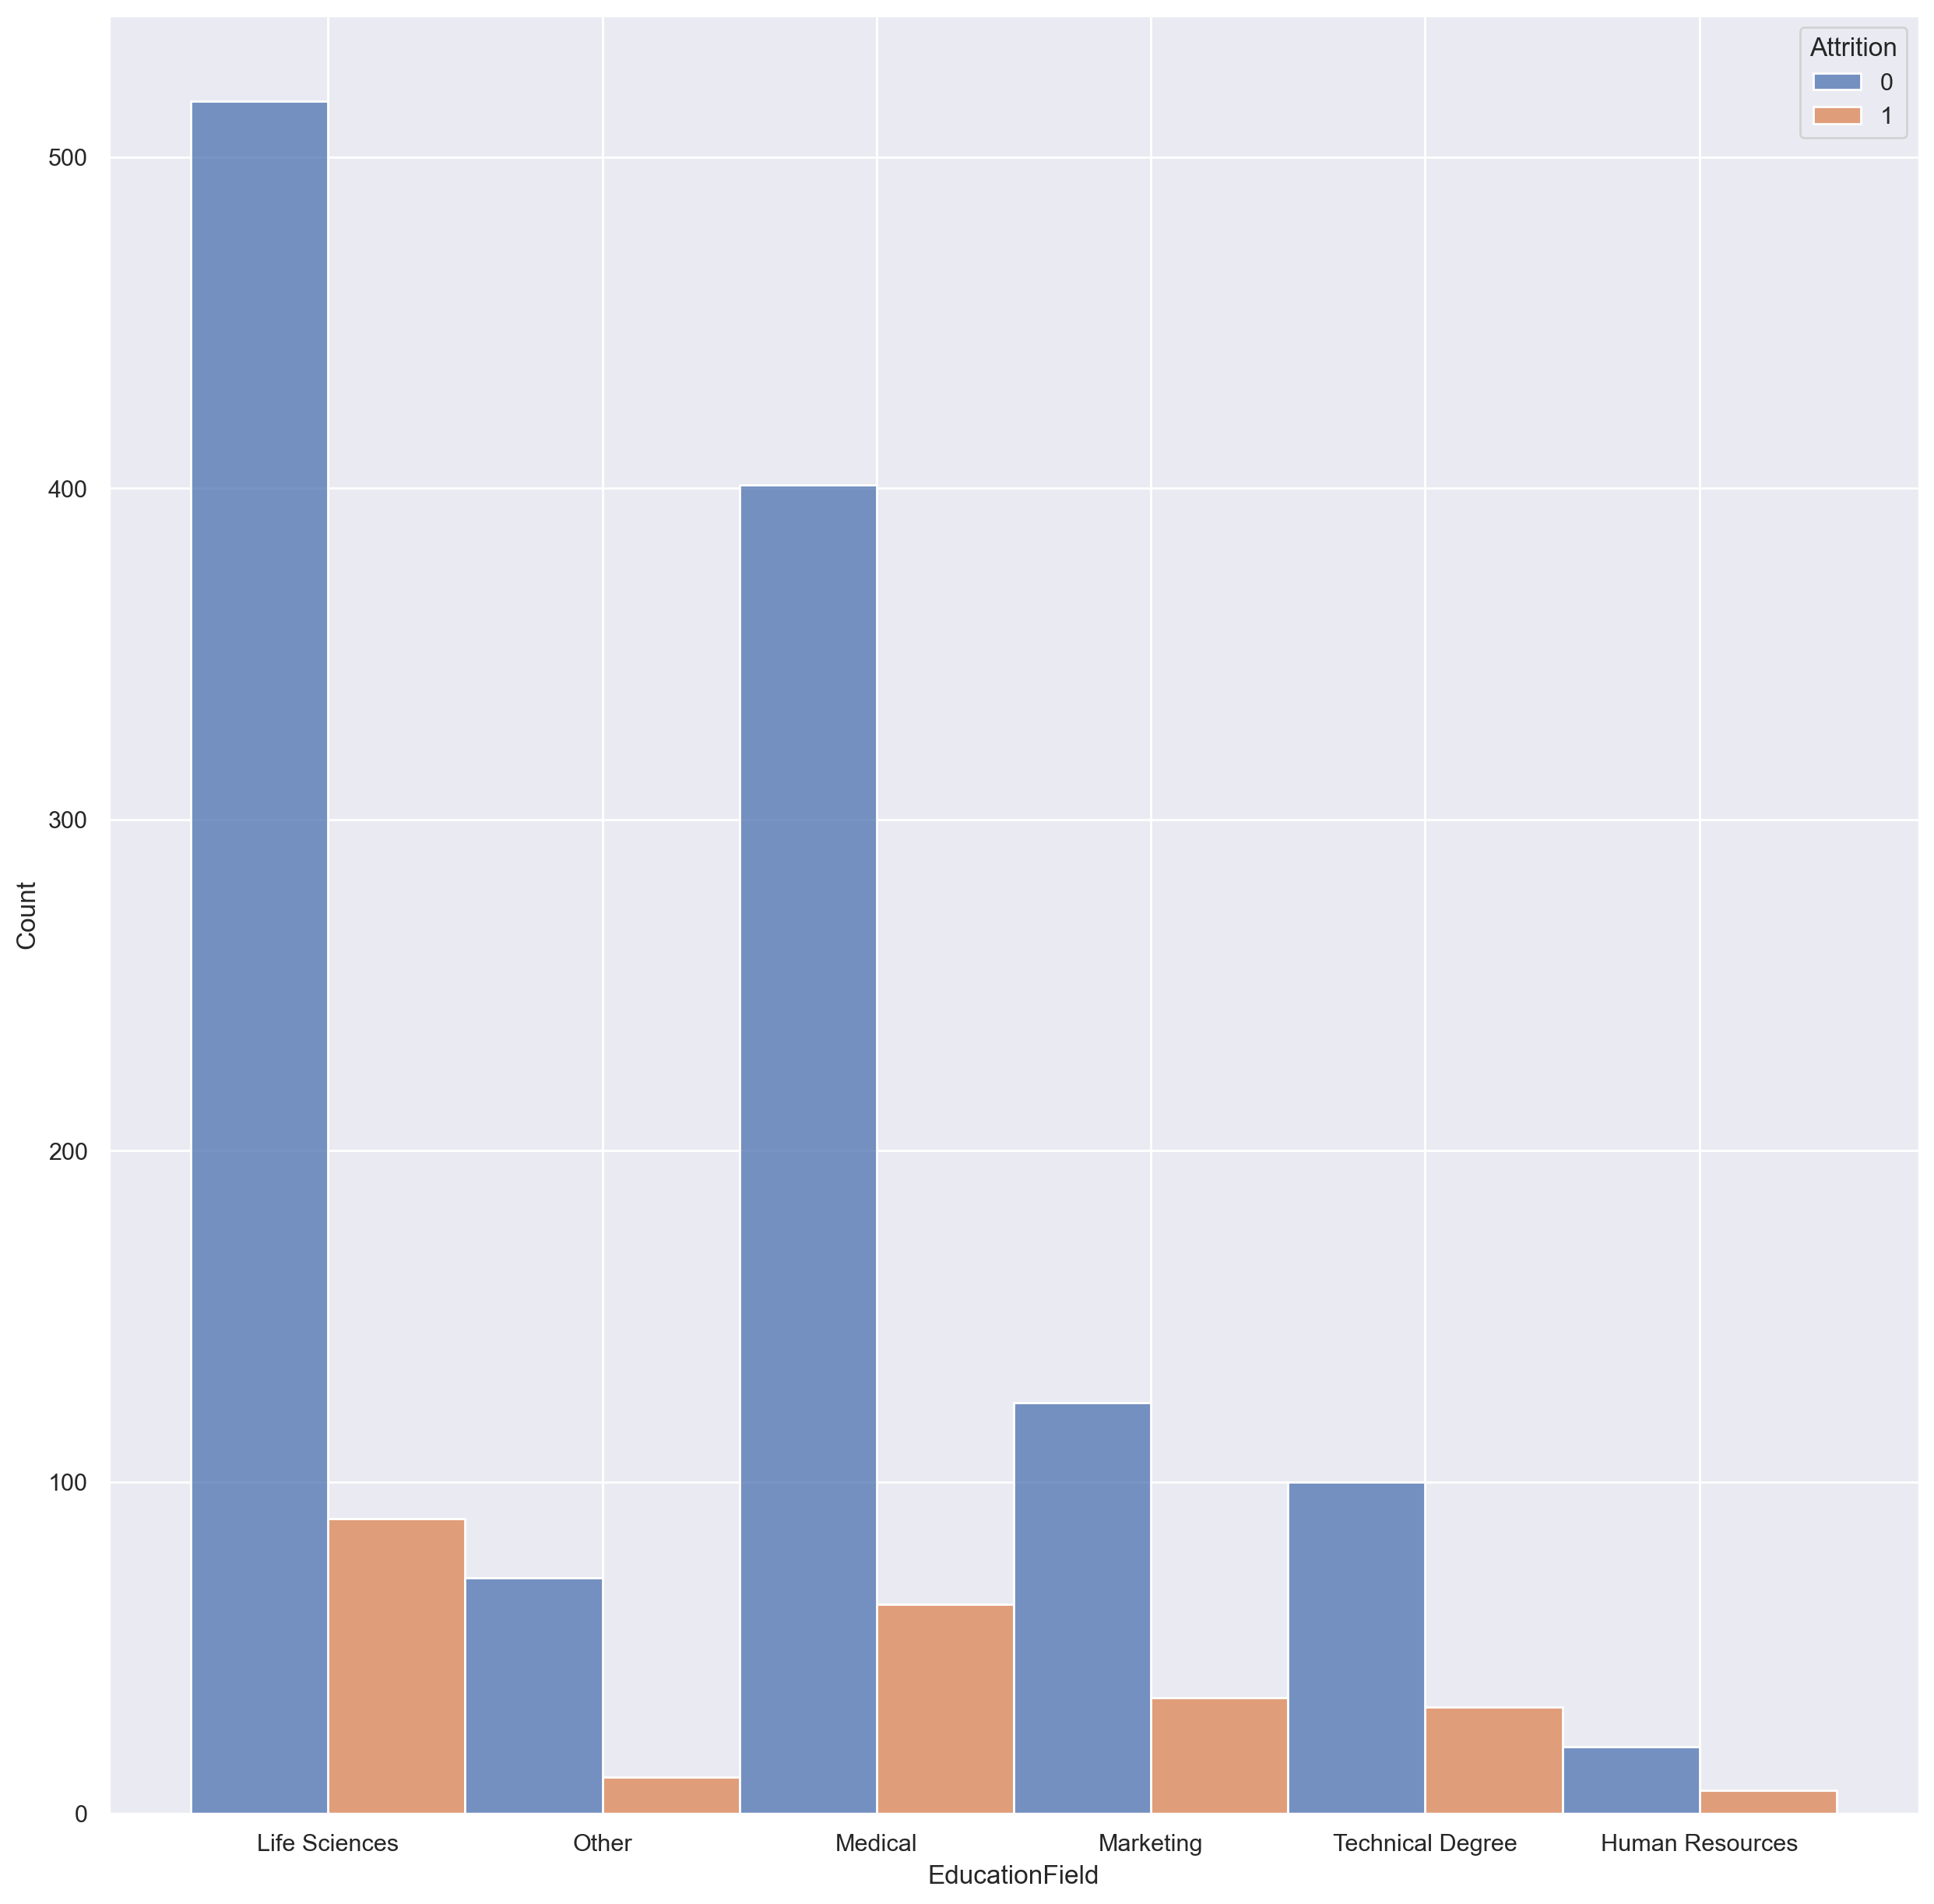

In [121]:
sns.histplot(data=df, x="EducationField", hue="Attrition", multiple="dodge")

In [122]:
df.groupby(by=['EducationField'])['Attrition'].mean().sort_values(ascending=False).reset_index()

EducationField  Attrition
0   Human Resources   0.259259
1  Technical Degree   0.242424
2         Marketing   0.220126
3     Life Sciences   0.146865
4           Medical   0.135776
5             Other   0.134146

# Inference
## What are some of the factors that might explain attrition?
### Using Logistic Regression

Ref (How to interpret odds, logodds, probability)
- https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [123]:
# Data transformation: create dummy variables for the categorical variables
df1 = pd.get_dummies(data=df, columns=['Department','Education','EducationField','MaritalStatus'])
df1.head()

Age  Attrition  DistanceFromHome  EnvironmentSatisfaction  JobSatisfaction  \
0   41          1                 1                        2                4   
1   49          0                 8                        3                2   
2   37          1                 2                        4                3   
3   33          0                 3                        4                3   
4   27          0                 2                        1                2   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  \
0           5993                   8                1               6   
1           5130                   1                3              10   
2           2090                   6                3               0   
3           2909                   1                3               8   
4           3468                   9                3               2   

   Department_Human Resources  ...  Education_5  \
0                           0  ...            0   
1                           0  ...            0   
2                           0  ...            0   
3                           0  ...            0   
4                           0  ...            0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             1   
4                               0                             0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     1   
3                         0                       0                     0   
4                         0                       1                     0   

   EducationField_Technical Degree  MaritalStatus_Divorced  \
0                                0                       0   
1                                0                       0   
2                                0                       0   
3                                0                       0   
4                                0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 26 columns]

In [124]:
"""
Features/DataTypes
Age                         int64
Attrition                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
"""
target = 'Attrition'
cols_num = [
            'Age', 
            'DistanceFromHome',
            'EnvironmentSatisfaction',
            'JobSatisfaction',
            'MonthlyIncome',
            'NumCompaniesWorked',
            'WorkLifeBalance',
            'YearsAtCompany'
           ]
cols_cat = [
            'Department',
            'Education',
            'EducationField',
            'MaritalStatus'
           ]

In [125]:
for col in cols_cat:
    print(f"### {col}:\n{df[col].value_counts()}\n")

### Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

### Education:
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

### EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

### MaritalStatus:
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64



In [126]:
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [127]:
encoded = encoder.fit_transform(df[cols_cat])
encoded[:5]

/Users/sayantansatpati/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0.]])

In [128]:
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols_cat))
one_hot_df.head()

Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  Education_1  Education_2  Education_3  Education_4  \
0               1.0          0.0          1.0          0.0          0.0   
1               0.0          1.0          0.0          0.0          0.0   
2               0.0          0.0          1.0          0.0          0.0   
3               0.0          0.0          0.0          0.0          1.0   
4               0.0          1.0          0.0          0.0          0.0   

   Education_5  EducationField_Human Resources  EducationField_Life Sciences  \
0          0.0                             0.0                           1.0   
1          0.0                             0.0                           1.0   
2          0.0                             0.0                           0.0   
3          0.0                             0.0                           1.0   
4          0.0                             0.0                           0.0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                       0.0                     0.0                   0.0   
1                       0.0                     0.0                   0.0   
2                       0.0                     0.0                   1.0   
3                       0.0                     0.0                   0.0   
4                       0.0                     1.0                   0.0   

   EducationField_Technical Degree  MaritalStatus_Divorced  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  
0                    0.0                   1.0  
1                    1.0                   0.0  
2                    0.0                   1.0  
3                    1.0                   0.0  
4                    1.0                   0.0

In [129]:
df[cols_num].head()

Age  DistanceFromHome  EnvironmentSatisfaction  JobSatisfaction  \
0   41                 1                        2                4   
1   49                 8                        3                2   
2   37                 2                        4                3   
3   33                 3                        4                3   
4   27                 2                        1                2   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                   8                1               6  
1           5130                   1                3              10  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2

In [130]:
X = pd.concat([df[cols_num], one_hot_df], axis=1)
y = df[target]
print(X.shape, y.shape)

(1470, 25) (1470,)


## Using sklearn Logistic Regression

In [131]:
# Initializing the Logistic Regression model
lr = LogisticRegression(solver='liblinear')

# Fitting the model on the training data
lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [132]:
print(f"Model Accuracy: {lr.score(X, y)}")

Model Accuracy: 0.8496598639455782


In [133]:
coefficients = lr.coef_[0]  # Extract coefficients
feature_names = X.columns  # Extract feature names

# Pairing coefficients with feature names
coefficients_df = pd.DataFrame({
                                'Feature': feature_names, 
                                'logodds': coefficients, 
                                'odds': np.exp(coefficients),
                                'probability': np.exp(coefficients) / (1+np.exp(coefficients))
                               })
print(f"\nIntercept: {lr.intercept_[0]}")
print(coefficients_df.sort_values(by=['probability'], ascending=False).reset_index(drop=True))


Intercept: 0.2793590733915659
                              Feature   logodds      odds  probability
0                MaritalStatus_Single  0.791123  2.205873     0.688072
1                    Department_Sales  0.359476  1.432579     0.588914
2     EducationField_Technical Degree  0.338162  1.402368     0.583744
3            EducationField_Marketing  0.197262  1.218063     0.549156
4                         Education_3  0.170040  1.185352     0.542408
5                  NumCompaniesWorked  0.116073  1.123078     0.528986
6      EducationField_Human Resources  0.111386  1.117826     0.527818
7                         Education_1  0.106992  1.112925     0.526722
8          Department_Human Resources  0.086068  1.089880     0.521504
9                         Education_2  0.052283  1.053674     0.513068
10                   DistanceFromHome  0.035183  1.035809     0.508795
11                        Education_4  0.002096  1.002098     0.500524
12                      MonthlyIncome -0.00010

# Interpretation of Logistic Regression coefficients 
## Ref (How to interpret odds, logodds, probability) 
- https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/
p = P(y=1), 1-p = P(y=0)

logit/logodds(p) = log(p/(1-p)) = b + b1*x1 + b2*x2 + ... bn*xn

odds = p/(1-p) = exp(logodds)

probablity = exp(logodds) / (1+exp(logodds))

Taking MaritalStatus_Single as an example: 
if MaritalStatus is Single: 
- Increases the logit/logodds of attrition by 0.791123
- Increases the odds of attrition by 2.205873
- Increases the probability of attrition by 0.688072

## Using statsmodel Logistic Regression (Another way)

In [134]:
logit_mod = sm.Logit(y, sm.add_constant(X))

In [135]:
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.377739
         Iterations 7


In [136]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                           21
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.1448
Time:                        19:32:01   Log-Likelihood:                -555.28
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.069e-29
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.0193   4.26e+06   2.39e-07      1.000   -8.34e+06    8.34e+06
Age                                  -0.0352      0.011     -3

# Prediction

### Approach-1: Using sklearn (boosted) Decision Tree: GradientBoostingClassifier

How well can we predict attrition using the features/independent variables?


In [276]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2)

In [289]:
print(X_train.shape, y_train.shape, np.mean(y_train))
print(X_test.shape, y_test.shape, np.mean(y_test))

(1176, 25) (1176,) 0.1488095238095238
(294, 25) (294,) 0.2108843537414966


In [278]:
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=43)
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=43)

In [428]:
plt.plot(gbdt.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

AttributeError: 'GradientBoostingClassifier' object has no attribute 'loss_curve_'

### Classifier with 80% accuracy on test set (unseen data) looks okay but lets check how it is doing across the 2 classes: 0 (no attrition) and 1 (attrition)

In [280]:
y_preds = gbdt.predict(X_test)

In [281]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       232
           1       0.63      0.19      0.30        62

    accuracy                           0.81       294
   macro avg       0.72      0.58      0.59       294
weighted avg       0.78      0.81      0.76       294



### Classifier isn't doing that well for the +ve class. f1 score is 0.89 for negative class but only 0.30 for the +ve class. Possible things to try:

- Try hyper parameter tuning and come up with a better model
- High Bias. The features are not strong enough for predictions
- There is also a class imbalance problem that we can try to address using class weights or augment the data by a) gathering more positive labels or b) sythetically generate data (using LLM etc)


In [282]:
cm = confusion_matrix(y_test, gbdt.predict(X_test), labels=gbdt.classes_)
print(cm)

[[225   7]
 [ 50  12]]


### Interpretation 

|Type |Number |Comments |
|:-----|:----:|:----:|
|True Pos |12 |. |
|False Pos |7 |. |
|True Neg |225 |. |
|False Neg |50 |Needs to be improved |

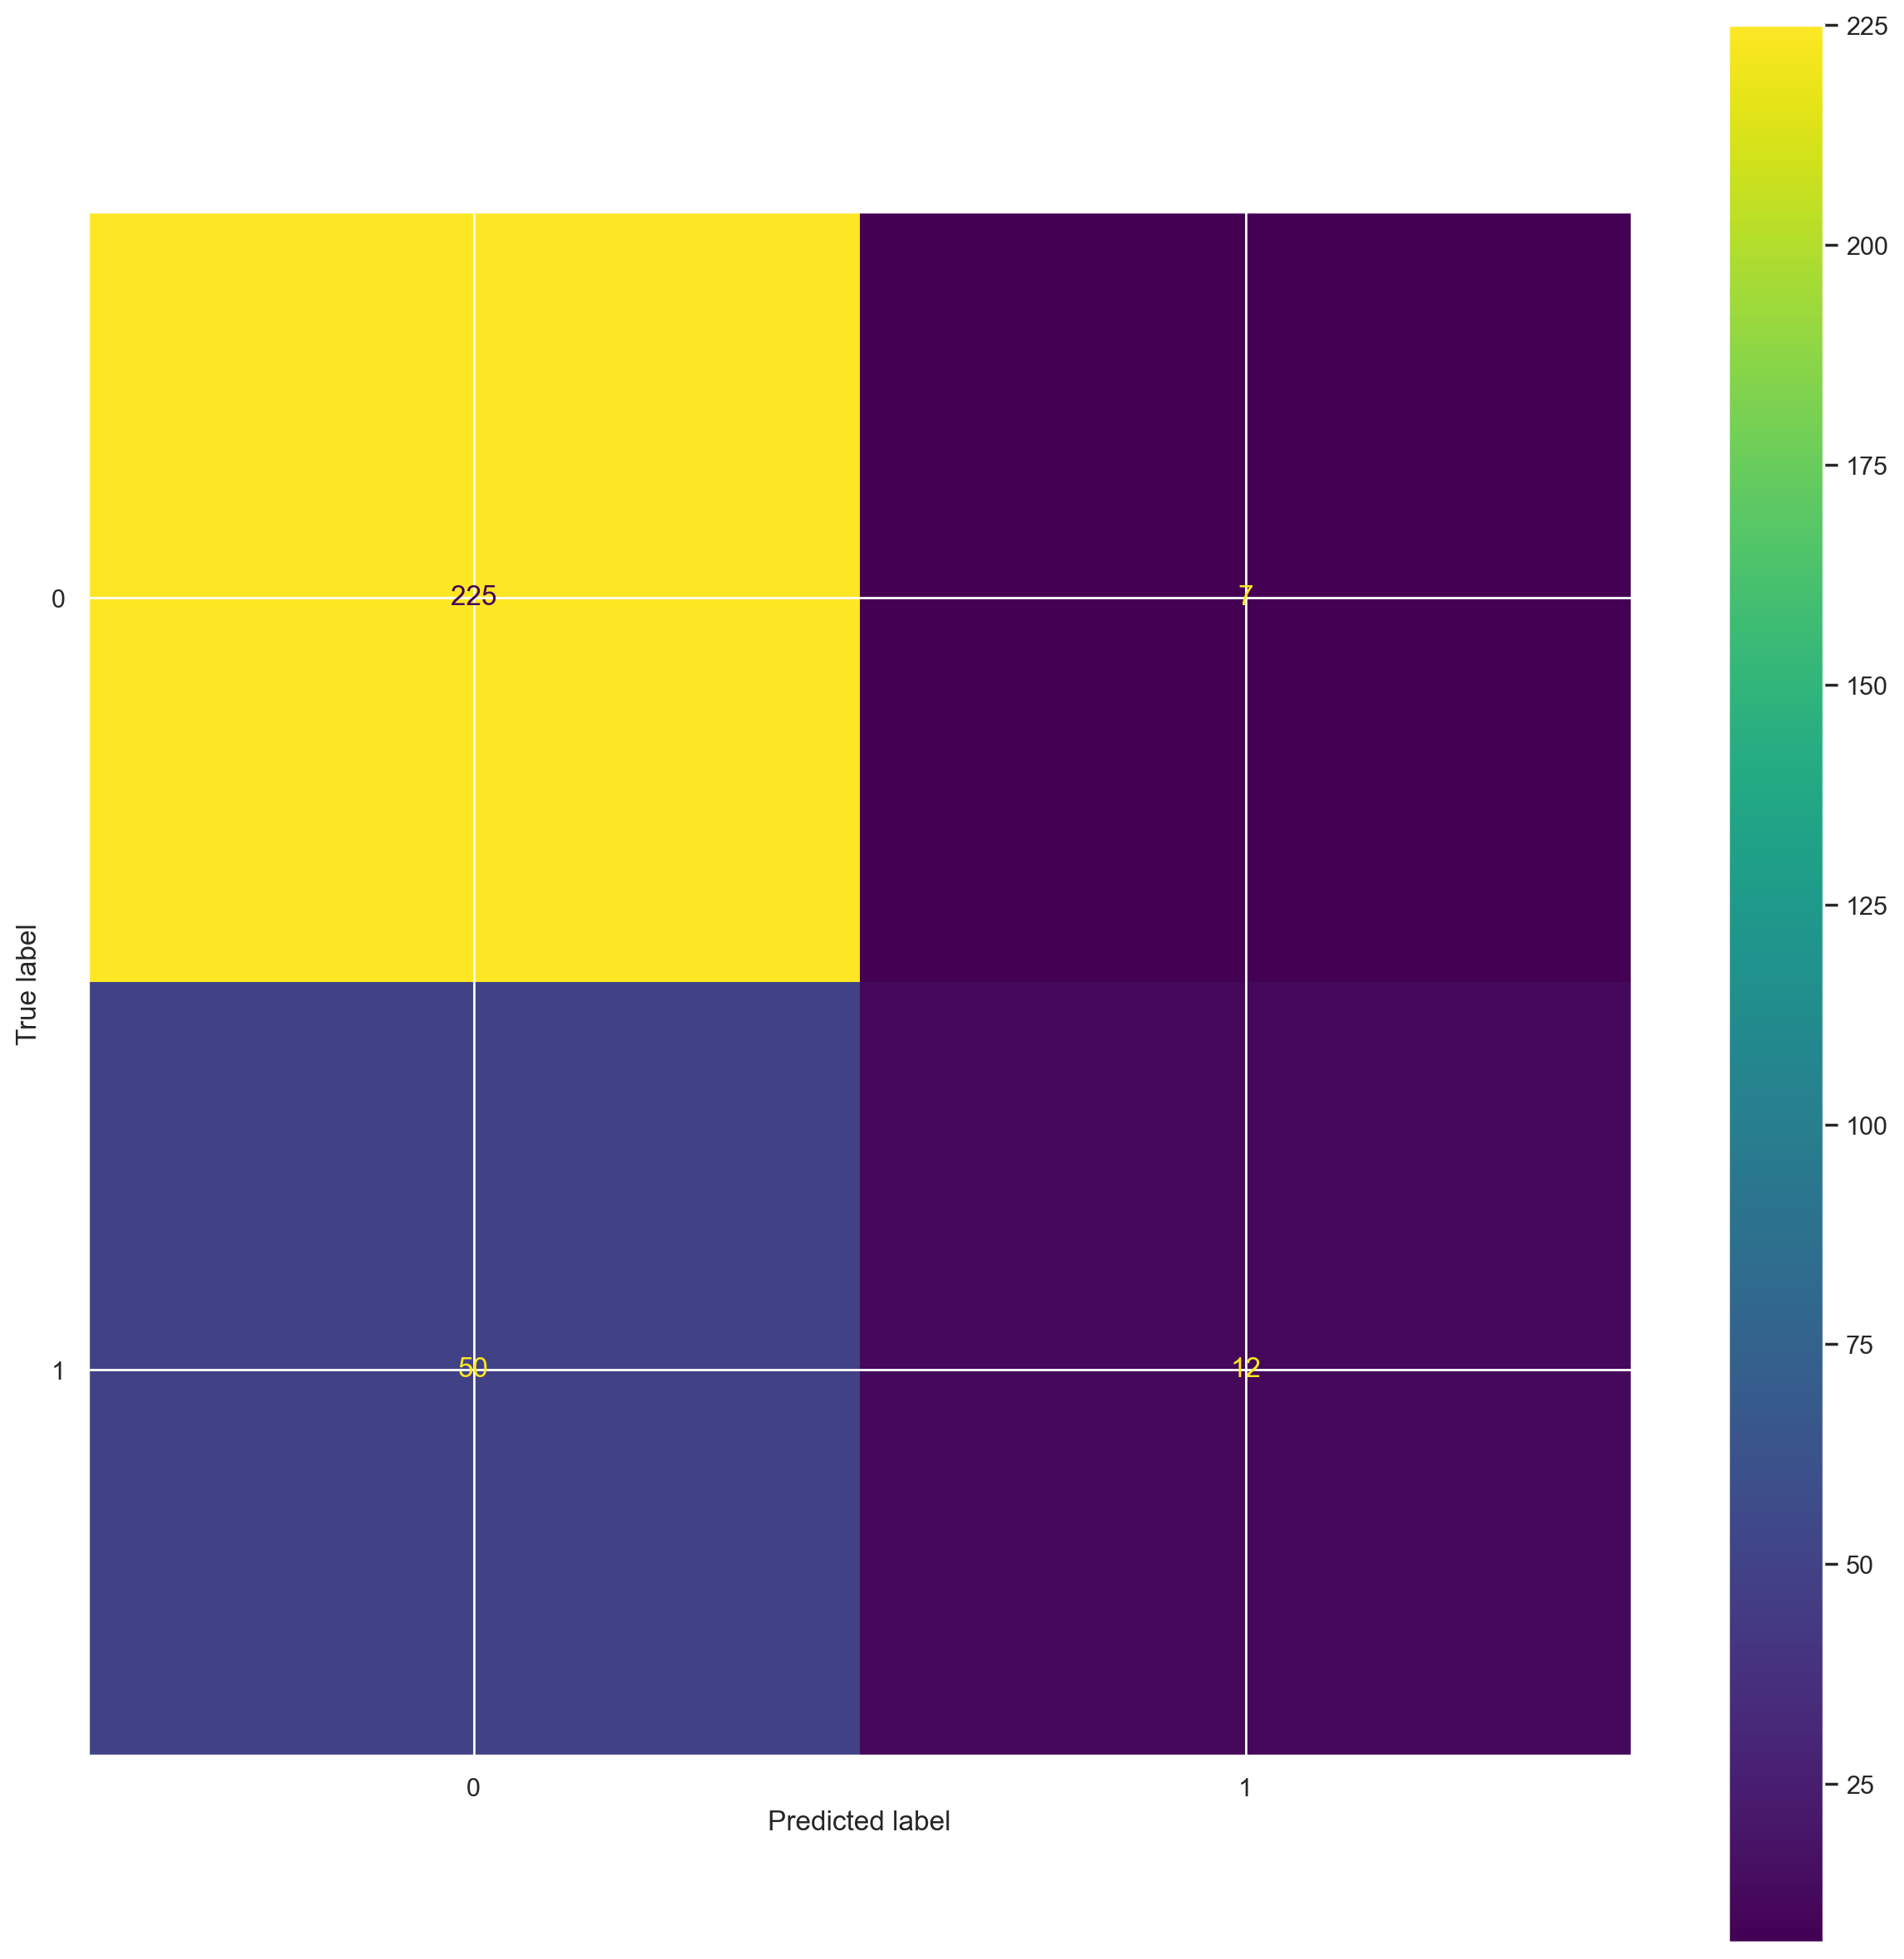

In [283]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=gbdt.classes_)
cmd.plot(values_format='g')
plt.show()

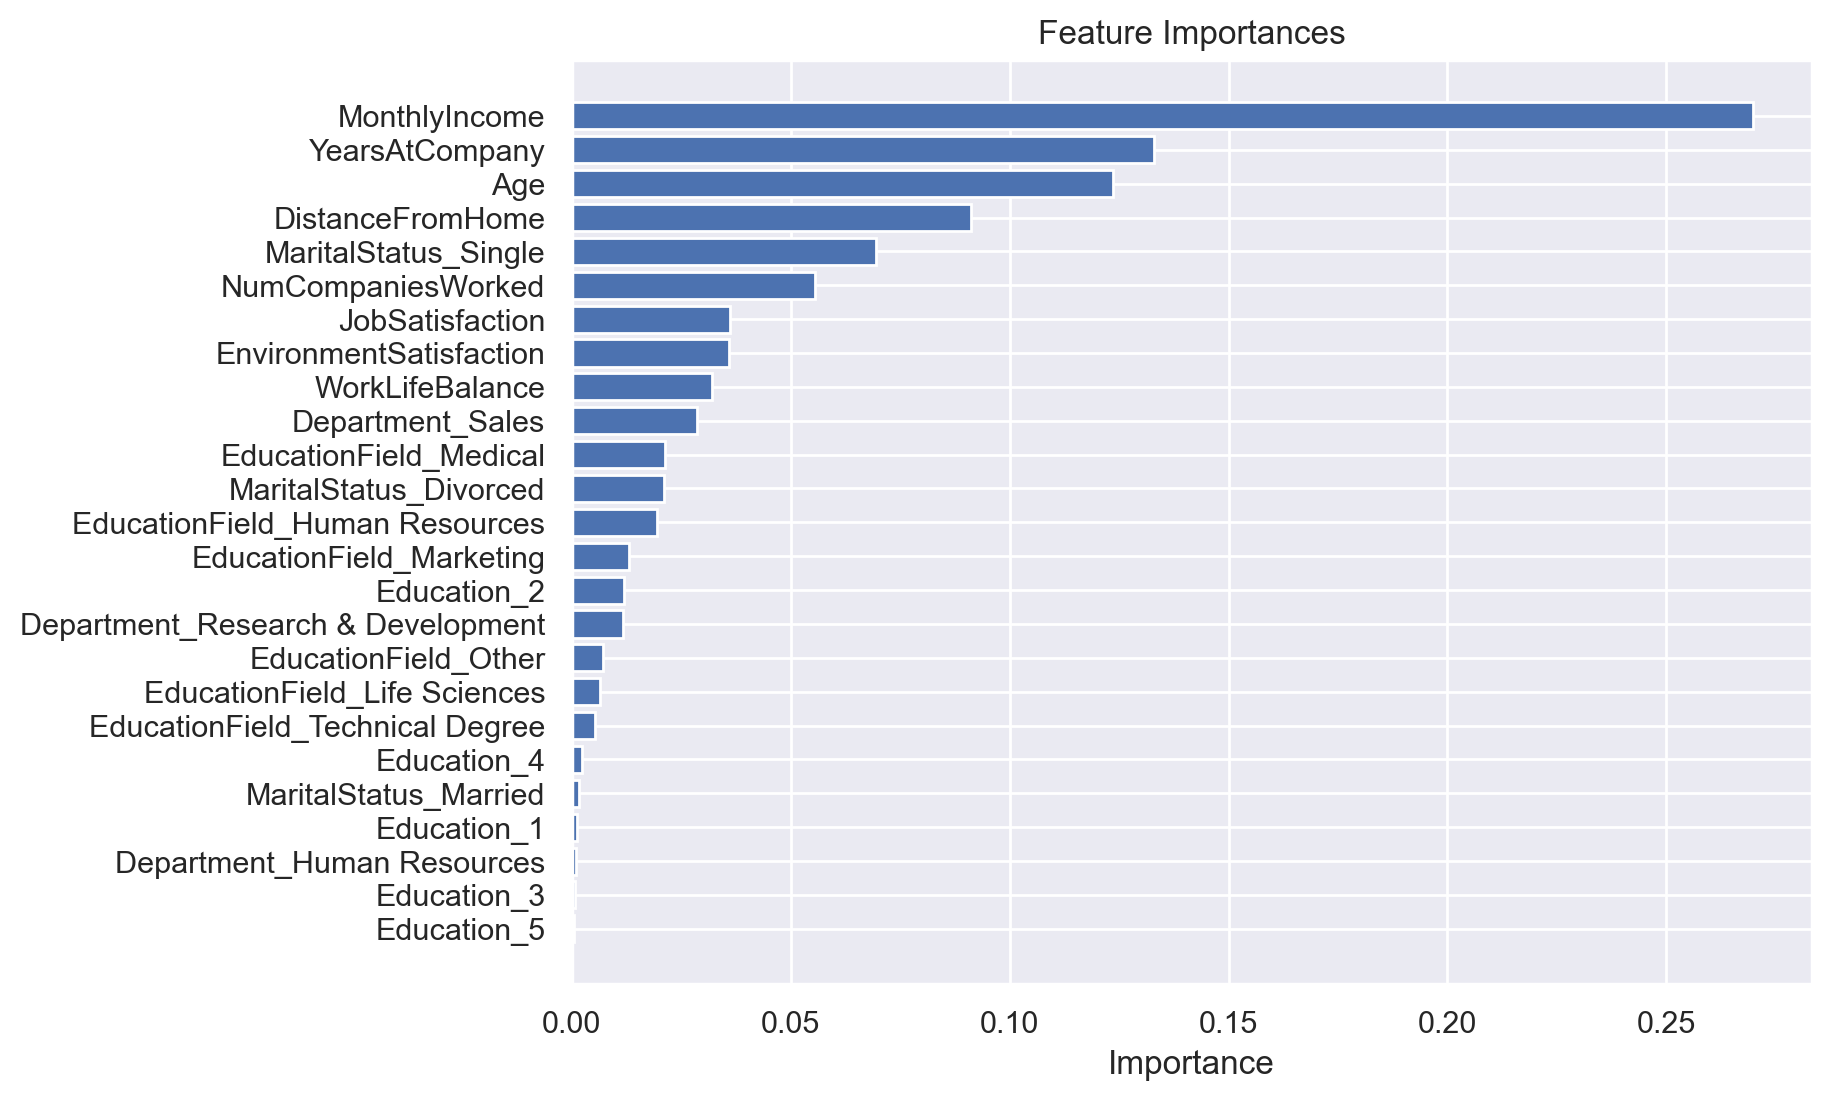

In [284]:
# Get feature importances
importances = gbdt.feature_importances_
feature_names = X.columns

# Create a sorted DataFrame of feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

# Plotting feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

### Approach-2: Using XGBoost Classifier

- Results are very similar

In [285]:
xgboost = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=43)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=43, ...)

In [286]:
y_preds = xgboost.predict(X_test)

In [287]:
print(f"Model Train Accuracy: {xgboost.score(X_train, y_train)}")
print(f"Model Test Accuracy: {xgboost.score(X_test, y_test)}")

Model Train Accuracy: 0.9438775510204082
Model Test Accuracy: 0.7925170068027211


In [288]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       232
           1       0.52      0.18      0.27        62

    accuracy                           0.79       294
   macro avg       0.67      0.57      0.57       294
weighted avg       0.75      0.79      0.75       294



### Approach-3: Using a simple deep neural network (Multi Layer Perceptron)

- Hyperparameter Tuning can improve the classification metrics

In [432]:
mlp = MLPClassifier(solver='adam', 
                    alpha=0.001,
                    learning_rate='adaptive',
                    hidden_layer_sizes=(10,10,),
                    batch_size=64,
                    max_iter=100,
                    random_state=43,
                    #early_stopping=True,
                    verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 30.68022742
Iteration 2, loss = 30.68021631
Iteration 3, loss = 29.61005224
Iteration 4, loss = 4.95190054
Iteration 5, loss = 5.34833666
Iteration 6, loss = 5.25723625
Iteration 7, loss = 3.29704157
Iteration 8, loss = 1.20458991
Iteration 9, loss = 0.79819185
Iteration 10, loss = 0.88487705
Iteration 11, loss = 0.71568055
Iteration 12, loss = 0.65228499
Iteration 13, loss = 0.69804745
Iteration 14, loss = 0.66789318
Iteration 15, loss = 0.68613611
Iteration 16, loss = 0.73526145
Iteration 17, loss = 0.65239912
Iteration 18, loss = 0.71409780
Iteration 19, loss = 0.69282301
Iteration 20, loss = 0.62261844
Iteration 21, loss = 0.69389677
Iteration 22, loss = 0.61916139
Iteration 23, loss = 0.57154694
Iteration 24, loss = 0.61422975
Iteration 25, loss = 0.59387222
Iteration 26, loss = 0.56469775
Iteration 27, loss = 0.54205021
Iteration 28, loss = 0.49792934
Iteration 29, loss = 0.54048096
Iteration 30, loss = 0.53294868
Iteration 31, loss = 0.59186870
Iteration 32, 

MLPClassifier(alpha=0.001, batch_size=64, hidden_layer_sizes=(10, 10),
              learning_rate='adaptive', max_iter=100, random_state=43,
              verbose=True)

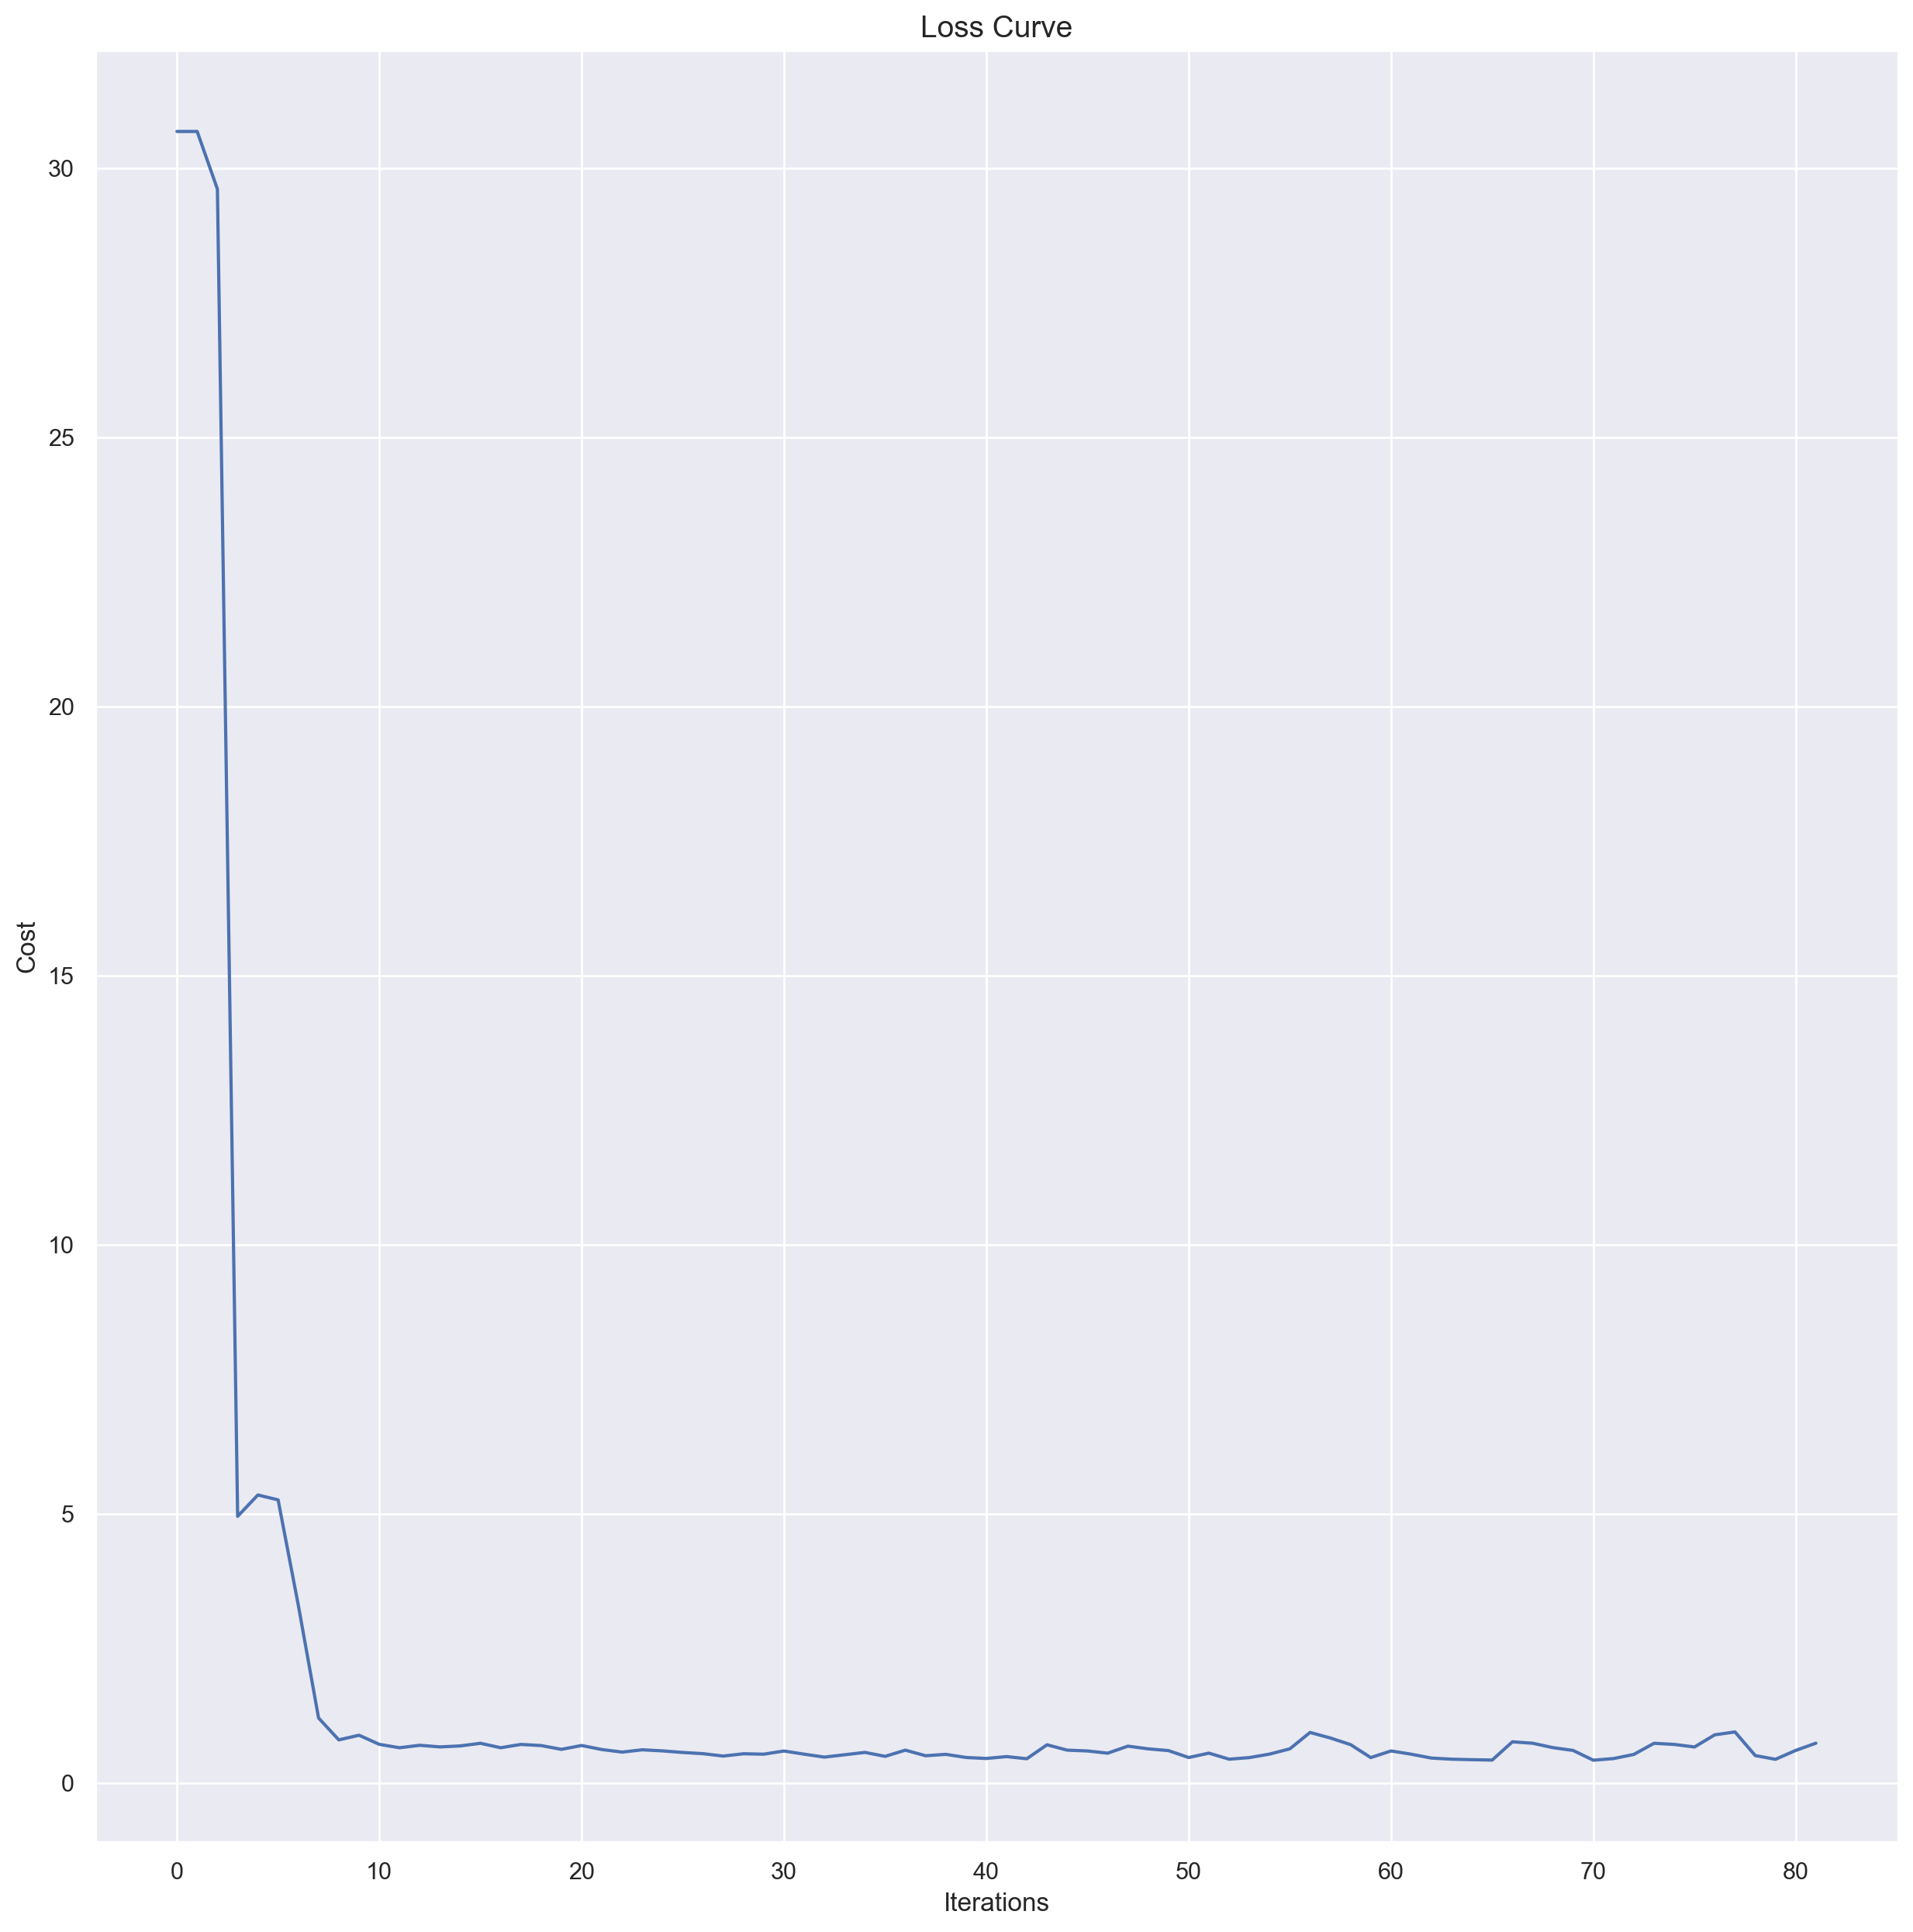

In [433]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [434]:
y_preds = mlp.predict(X_test)

In [435]:
print(f"Model Train Accuracy: {mlp.score(X_train, y_train)}")
print(f"Model Test Accuracy: {mlp.score(X_test, y_test)}")

Model Train Accuracy: 0.8477891156462585
Model Test Accuracy: 0.7959183673469388


In [436]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       232
           1       0.75      0.05      0.09        62

    accuracy                           0.80       294
   macro avg       0.77      0.52      0.49       294
weighted avg       0.79      0.80      0.72       294

